In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sbn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix,precision_score,recall_score,f1_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from prettytable import PrettyTable
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC

# Loading data

In [2]:
creditcard_data = pd.read_csv('creditcard.csv')

In [3]:
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
creditcard_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
creditcard_data.shape

(284807, 31)

In [6]:
creditcard_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
creditcard_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
# No duplicates.
creditcard_data.duplicated().sum()

1081

In [9]:
#check information about column
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
creditcard_data.isnull().values.any()

False

In [11]:
# checking the number of missing values in each column
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
# Drop rows with missing values
creditcard_data = creditcard_data.dropna()

C:\Users\ketak\AppData\Local\Temp\ipykernel_15596\3417844007.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot( creditcard_data['Amount'], color='blue')


<AxesSubplot:xlabel='Amount', ylabel='Density'>

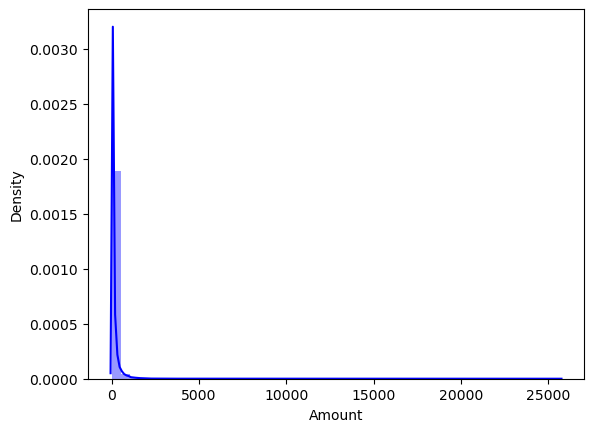

In [13]:
sbn.distplot( creditcard_data['Amount'], color='blue')

C:\Users\ketak\AppData\Local\Temp\ipykernel_15596\2077558638.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot( creditcard_data['Time'], color='#B6EB07')


<AxesSubplot:xlabel='Time', ylabel='Density'>

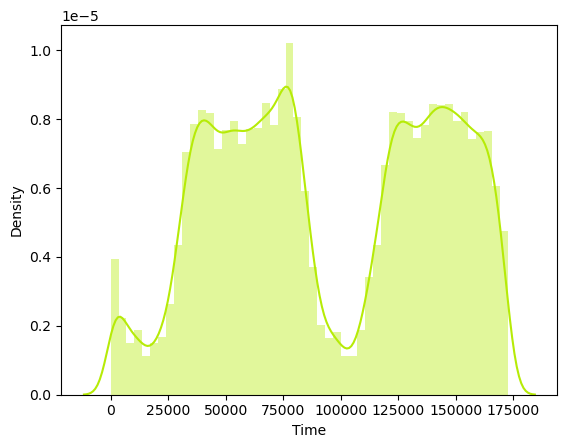

In [14]:
sbn.distplot( creditcard_data['Time'], color='#B6EB07')

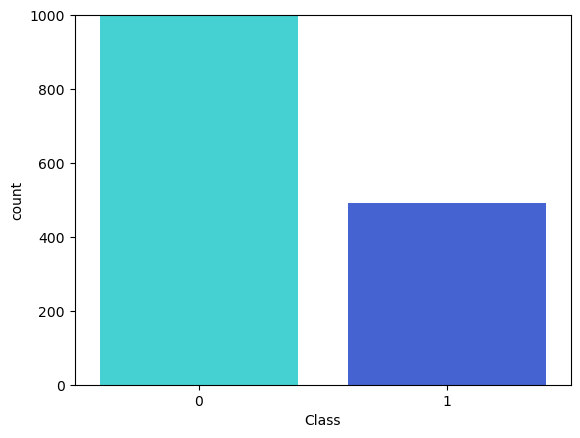

In [15]:
sns.countplot(x='Class', data=creditcard_data, palette=['#2EE8E8', '#2E57E8'])

# Set range of y-axis
plt.ylim(0, 1000)

# Show plot
plt.show()

In [16]:
#Determine the number of fraud and valid transactions in the dataset
Fraud = creditcard_data[creditcard_data['Class']==1]
Valid = creditcard_data[creditcard_data['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

print("Outlier fraction for dataset:",outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

Outlier fraction for dataset: 0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


In [17]:
# statistical measures of the data
Valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
# compare the values for both transactions
creditcard_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Outlier Analysis

In [20]:
def OutlierStats(df, factor=1.5):
    df1 = df.drop('Class', axis=1)
    q1 = df1.quantile(0.25)
    q3 = df1.quantile(0.75)
    IQR = q3 - q1
    print('Outlier')
    print(df[((df < q1 - factor*IQR) | (df > q1 + factor*IQR)).any(axis=1)].shape[0])
    print('Not outliers')
    print(df[~((df < q1 - factor*IQR) | (df > q1 + factor*IQR)).any(axis=1)].shape[0])

In [21]:
OutlierStats(creditcard_data, factor=1.5)

Outlier
256486
Not outliers


C:\Users\ketak\AppData\Local\Temp\ipykernel_15596\2663719985.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(df[((df < q1 - factor*IQR) | (df > q1 + factor*IQR)).any(axis=1)].shape[0])
C:\Users\ketak\AppData\Local\Temp\ipykernel_15596\2663719985.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(df[~((df < q1 - factor*IQR) | (df > q1 + factor*IQR)).any(axis=1)].shape[0])


28321


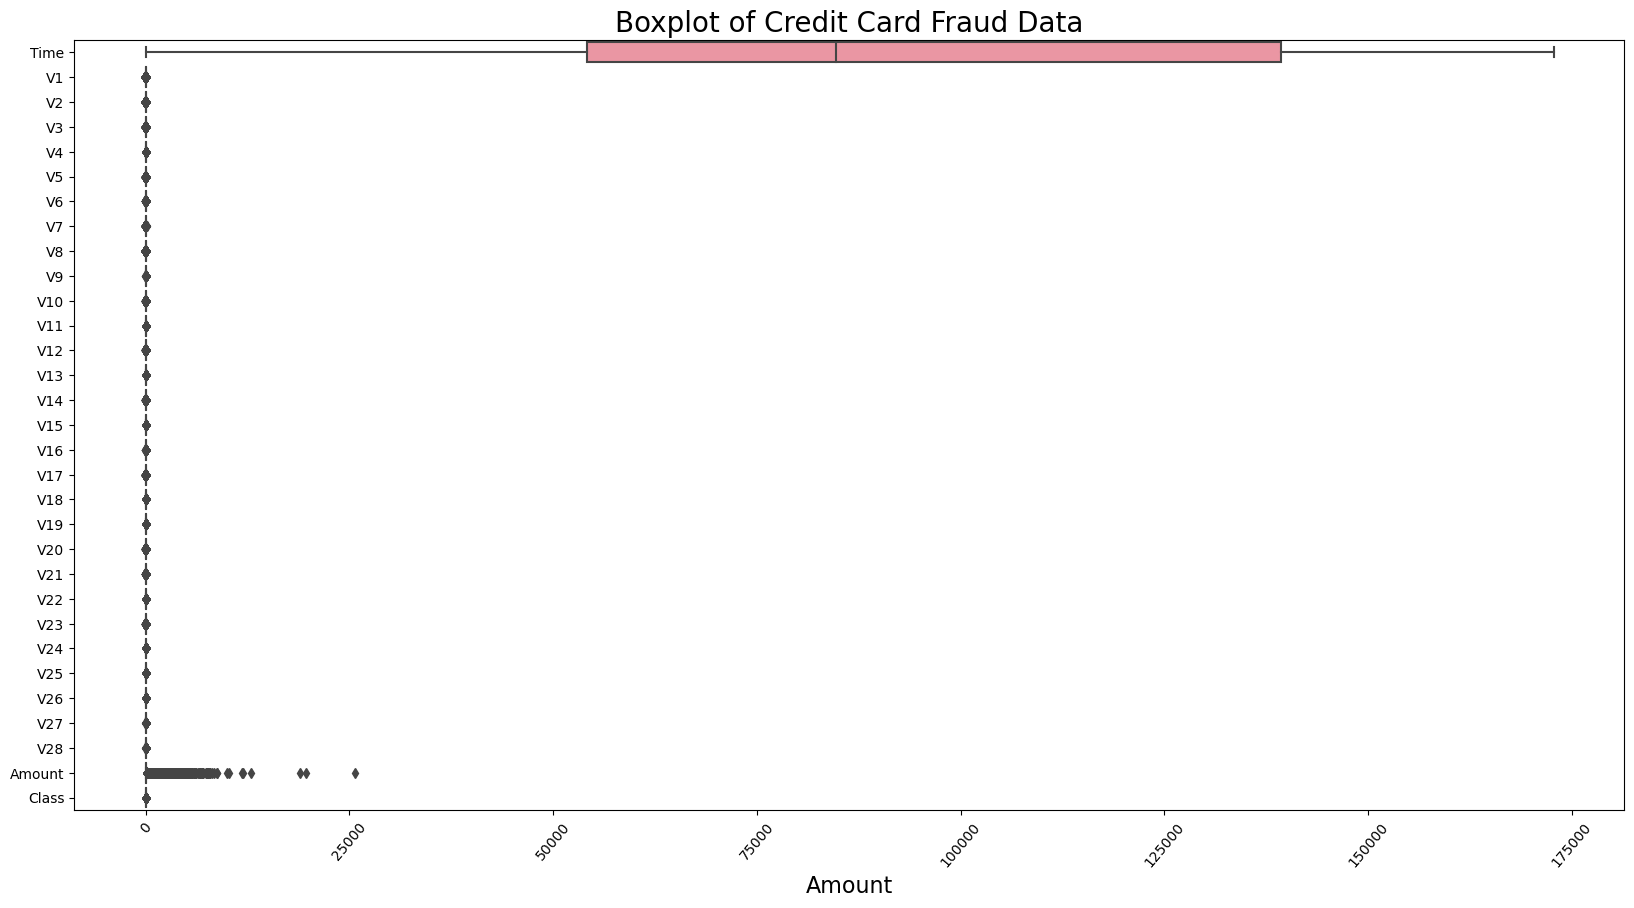

In [22]:
# create a box plot using seaborn
plt.figure(figsize=(20,10))
sns.boxplot(data=creditcard_data, orient='h')
plt.xticks(rotation=50)
plt.title('Boxplot of Credit Card Fraud Data', fontsize=20)
plt.xlabel('Amount', fontsize=16)
plt.show()

In [23]:
q1 = creditcard_data.drop('Class', axis=1).quantile(0.25)
q3 = creditcard_data.drop('Class', axis=1).quantile(0.75)
IQR = q3 - q1
outliers = ((creditcard_data < q1 - 1.5*IQR) | (creditcard_data > q3 + 1.5*IQR)).any(axis=1)
creditcard_data = creditcard_data[~outliers]

C:\Users\ketak\AppData\Local\Temp\ipykernel_15596\1684751241.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((creditcard_data < q1 - 1.5*IQR) | (creditcard_data > q3 + 1.5*IQR)).any(axis=1)


In [24]:
creditcard_data.shape

(146334, 31)

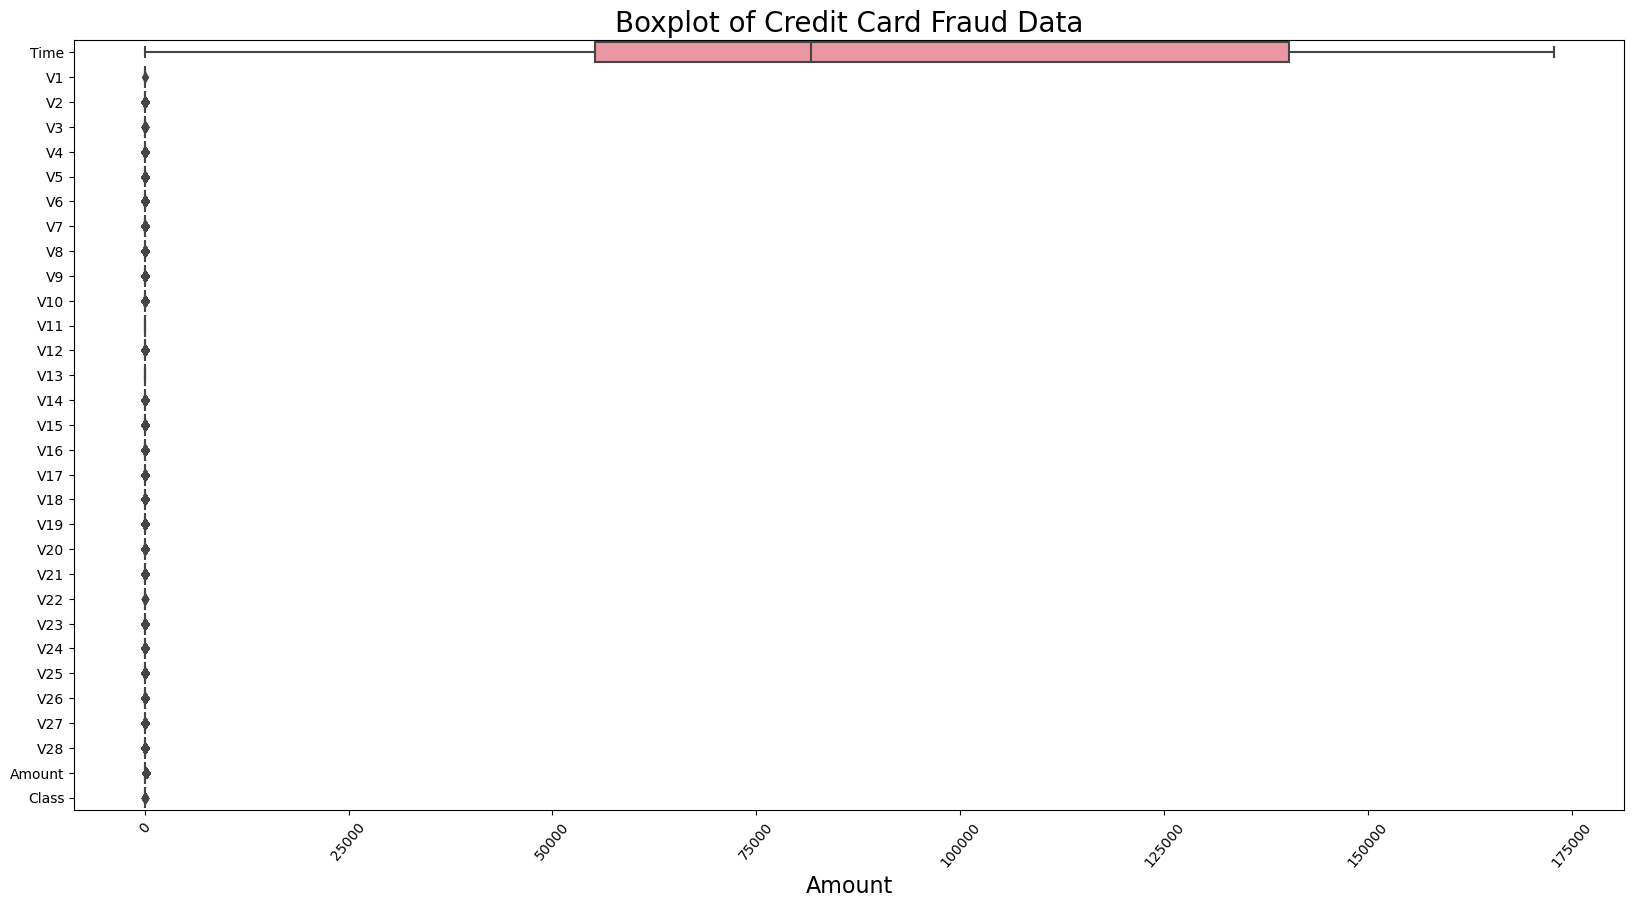

In [25]:
# create a box plot using seaborn
plt.figure(figsize=(20,10))
sns.boxplot(data=creditcard_data, orient='h')
plt.xticks(rotation=50)
plt.title('Boxplot of Credit Card Fraud Data', fontsize=20)
plt.xlabel('Amount', fontsize=16)
plt.show()

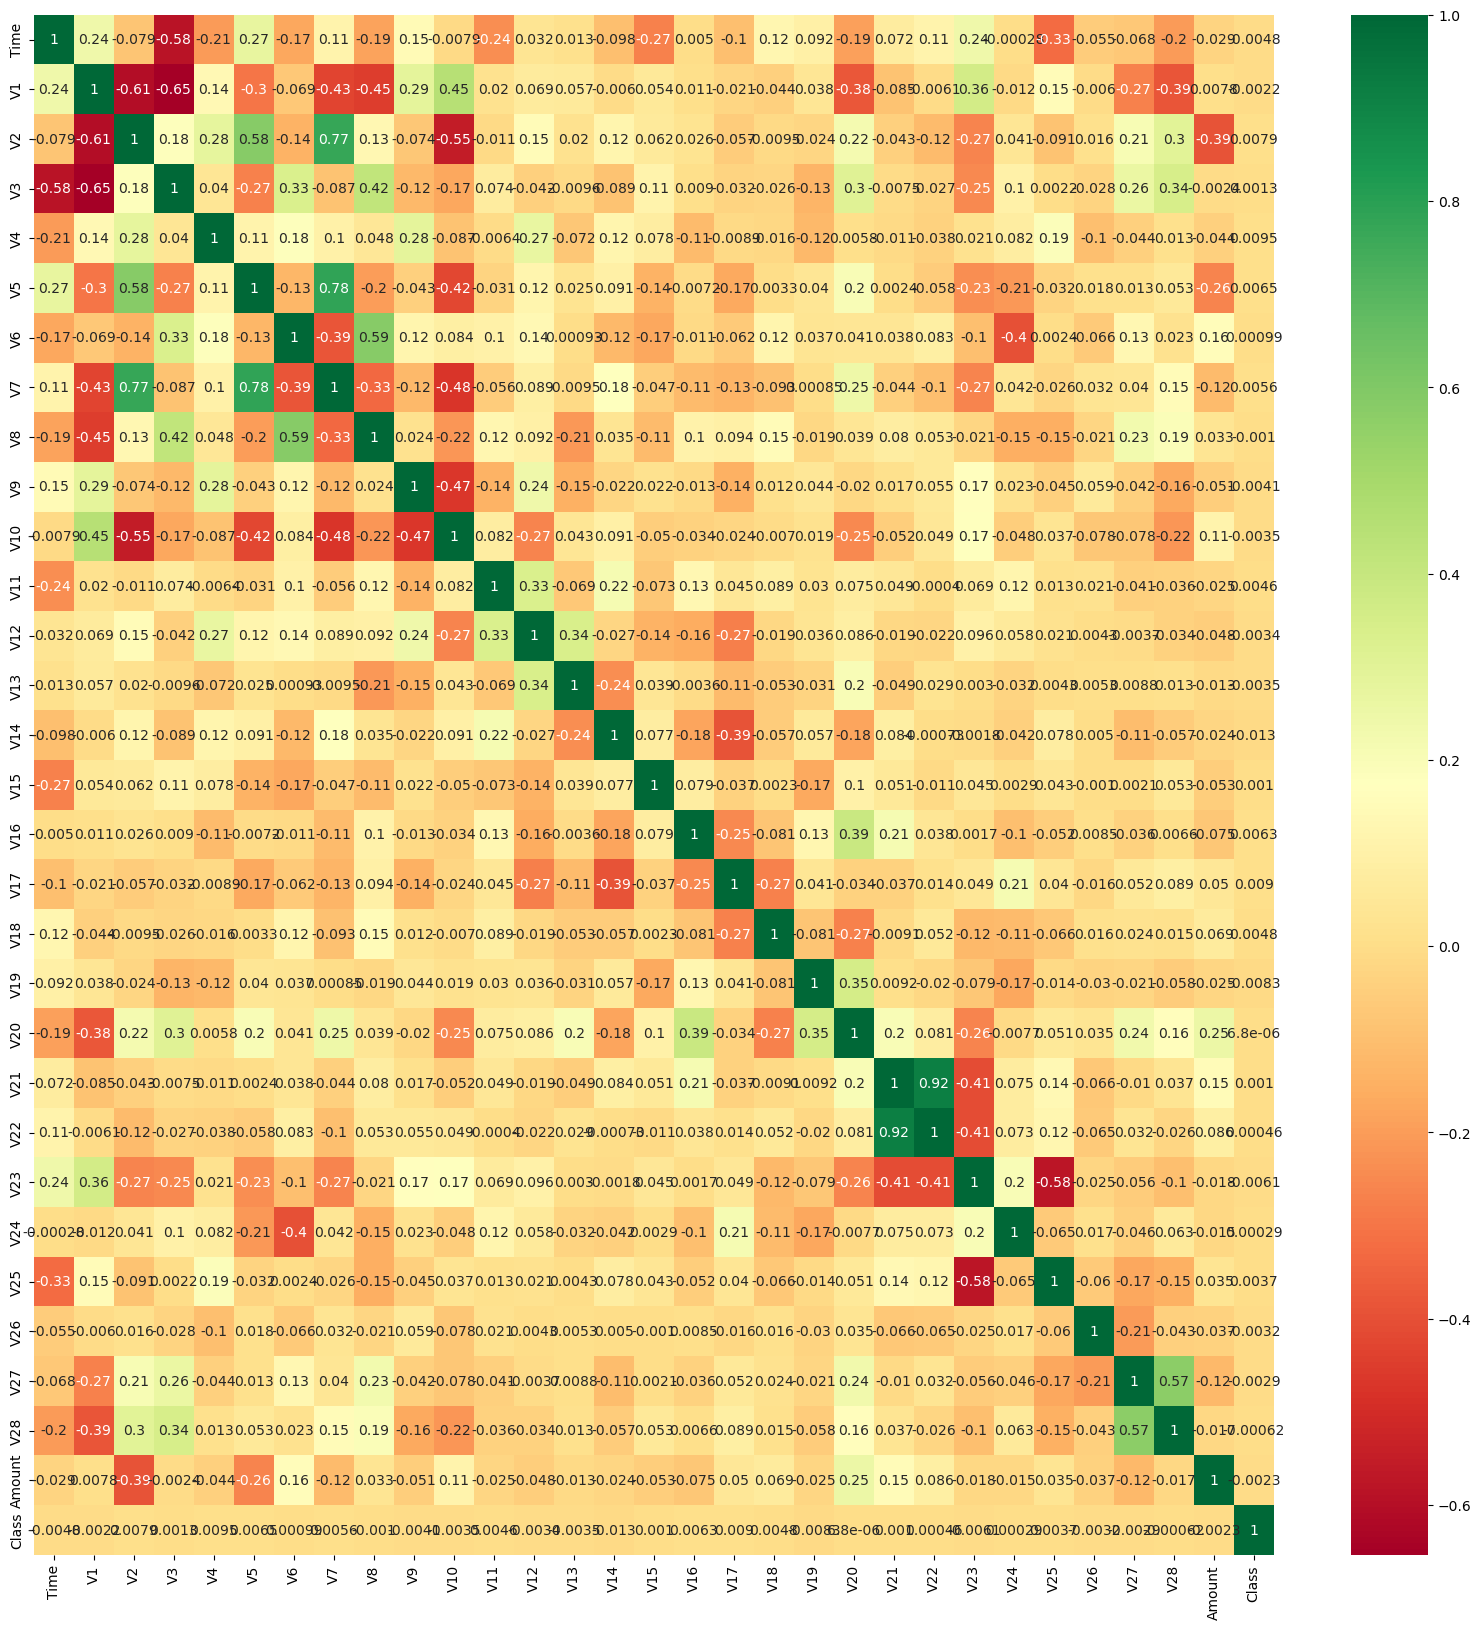

In [26]:
#get correlations of each features in dataset
corrmat = creditcard_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(creditcard_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [27]:
#creating a variable called lst
# creting a list (Name of variable is lst)
lst=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

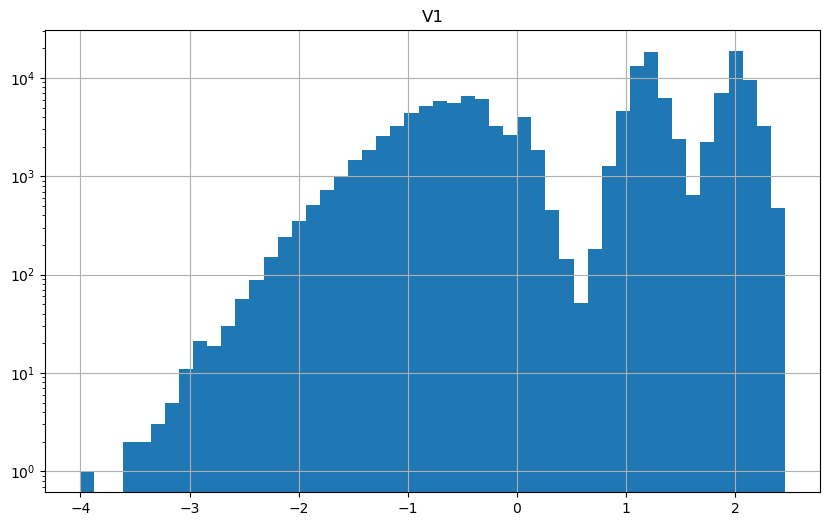

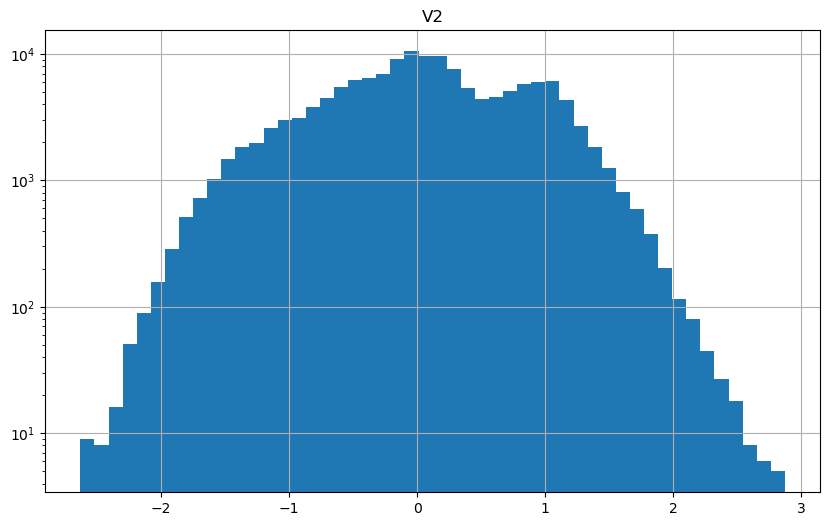

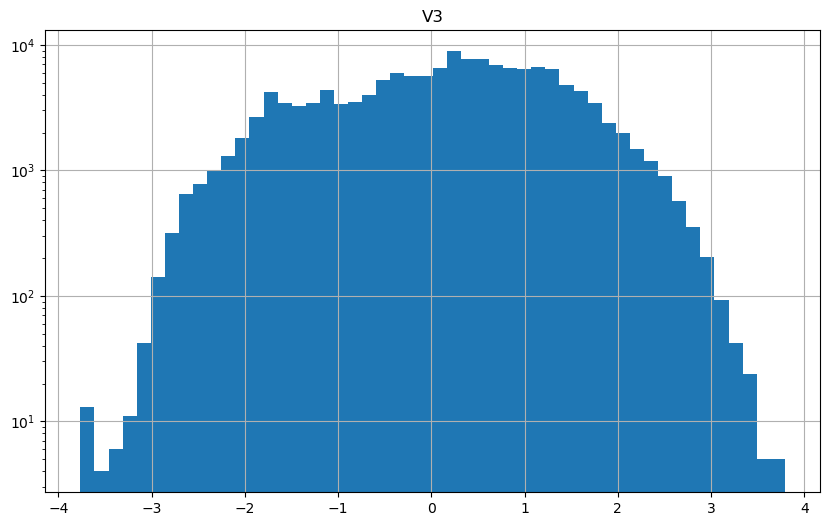

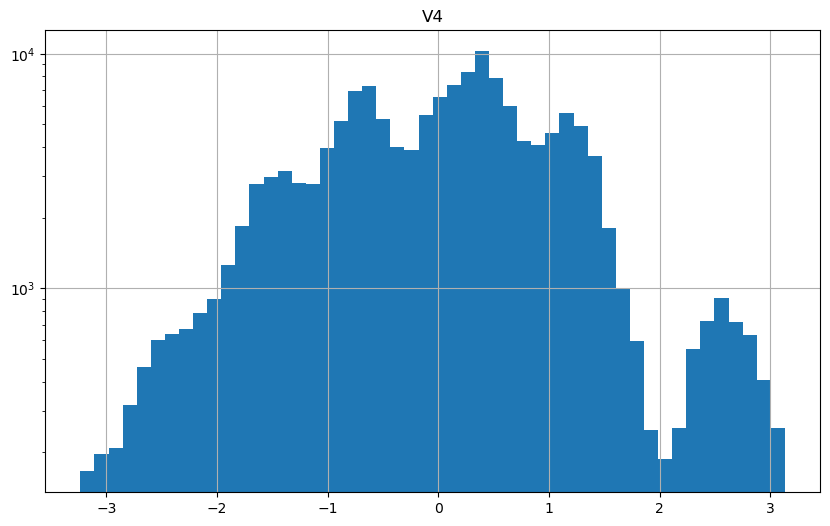

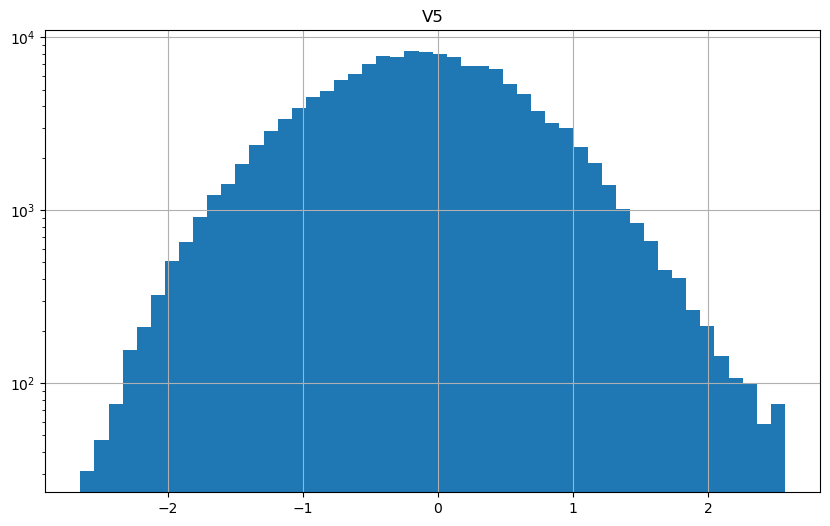

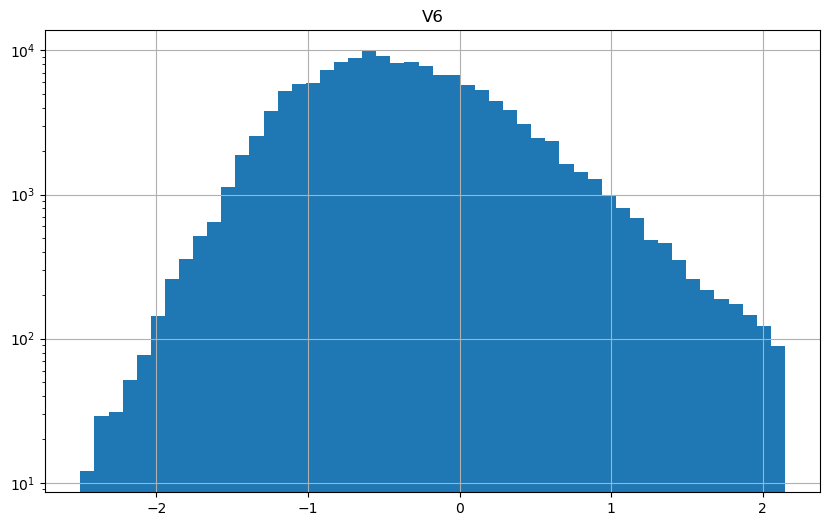

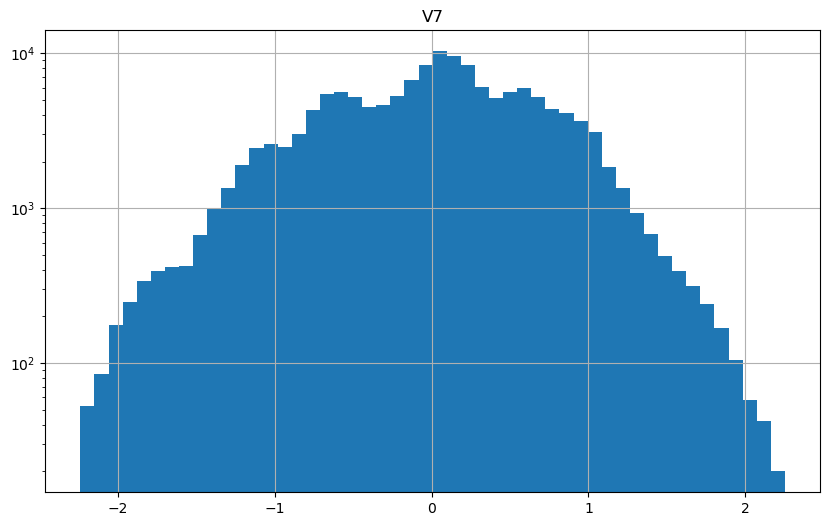

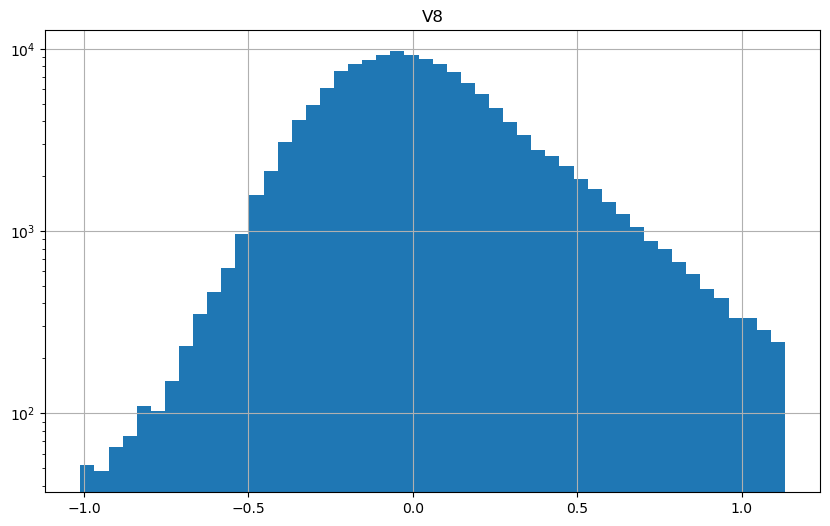

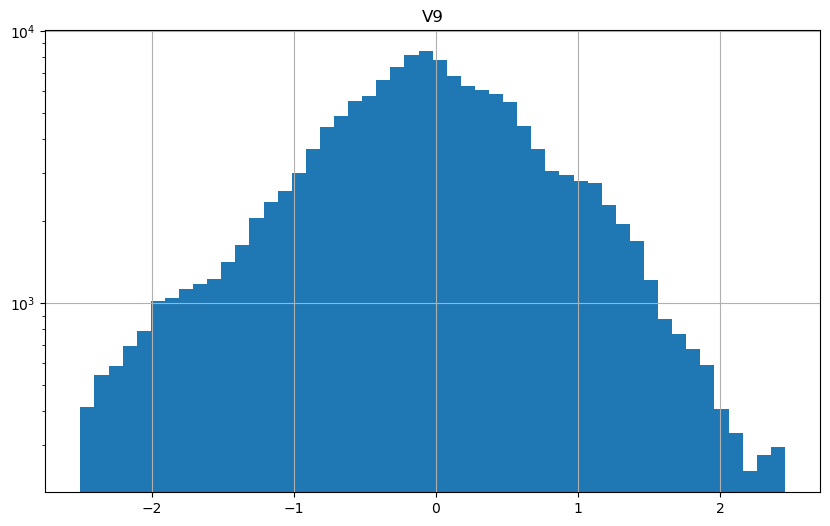

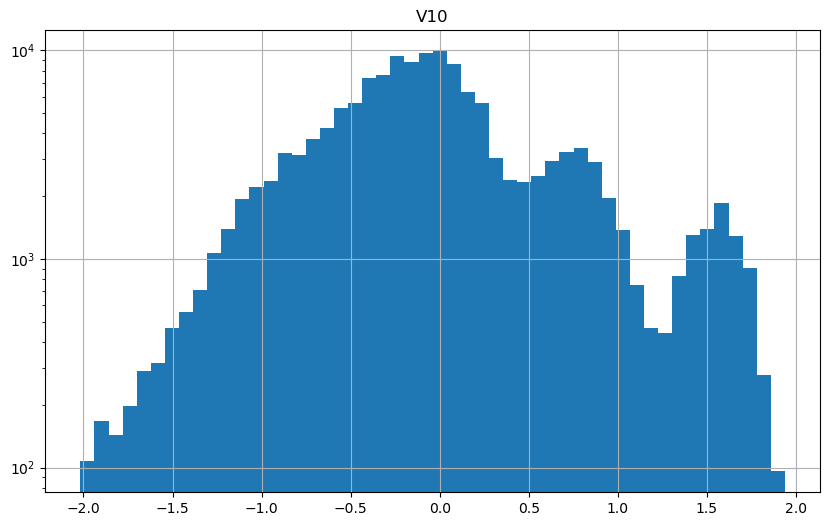

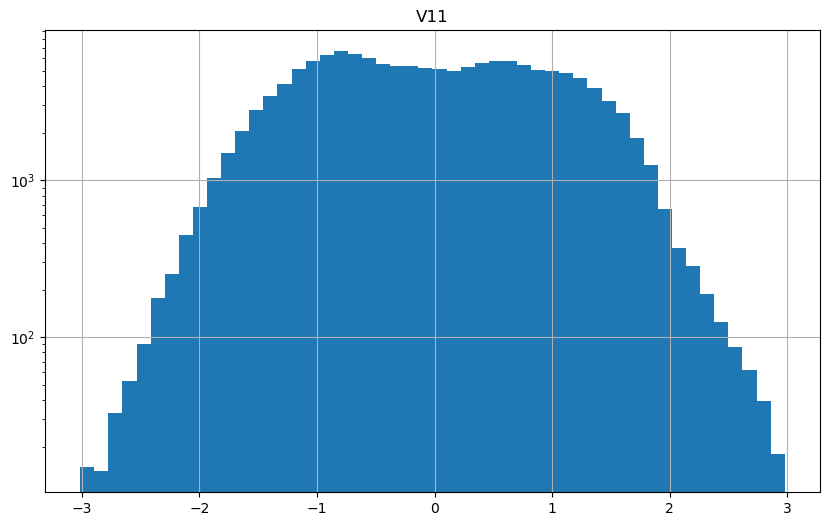

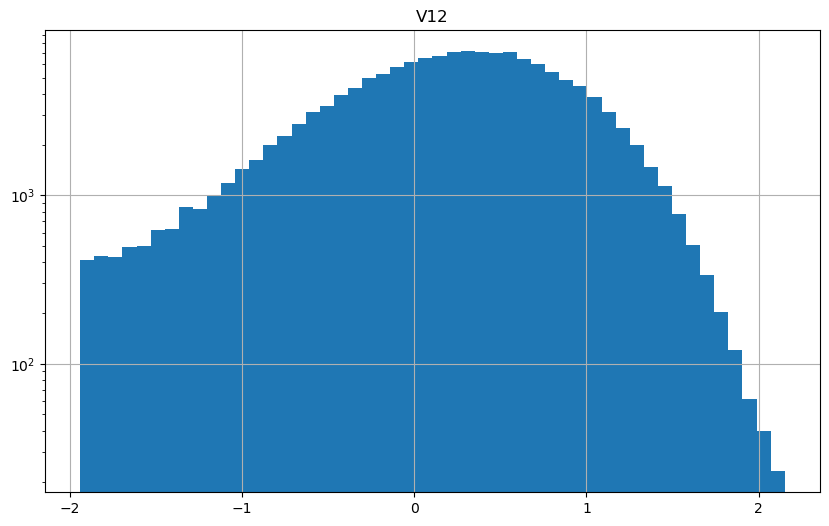

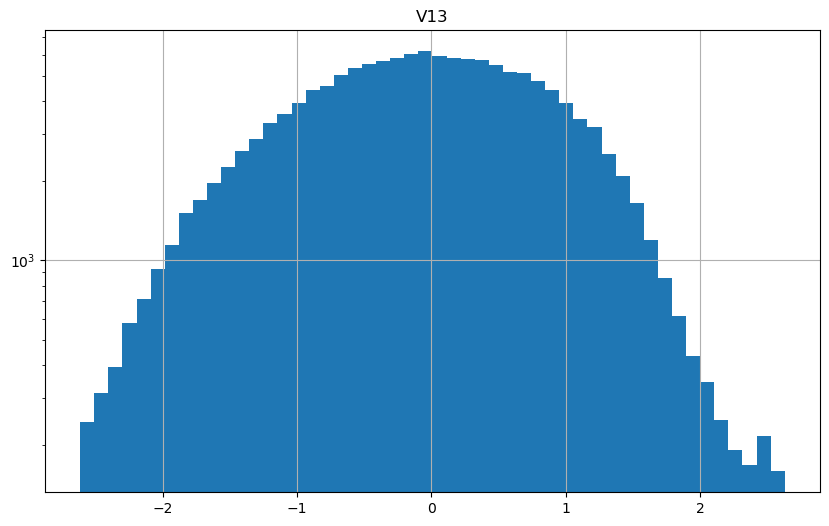

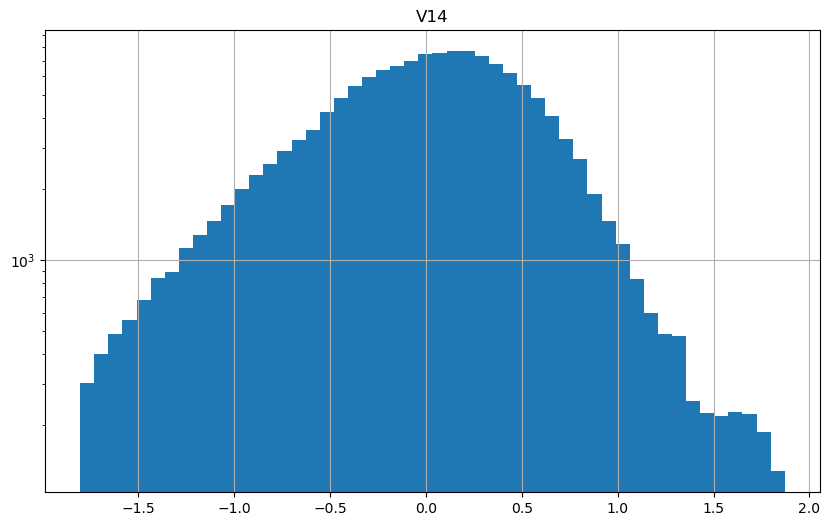

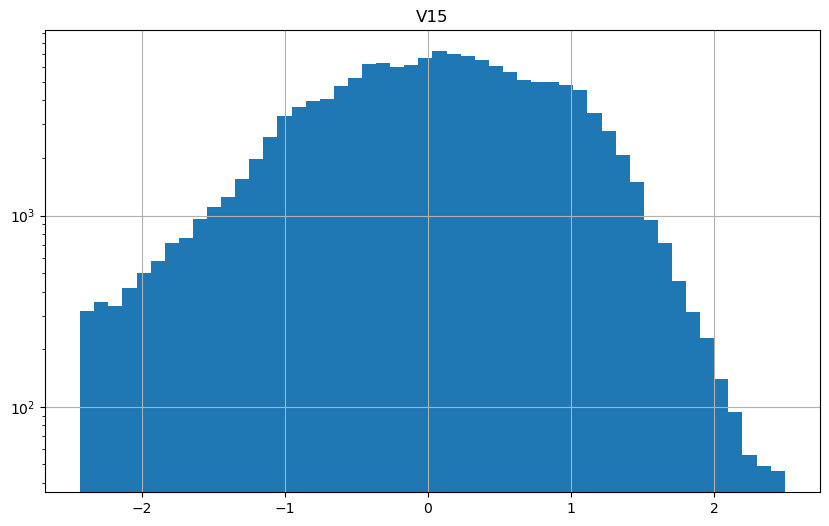

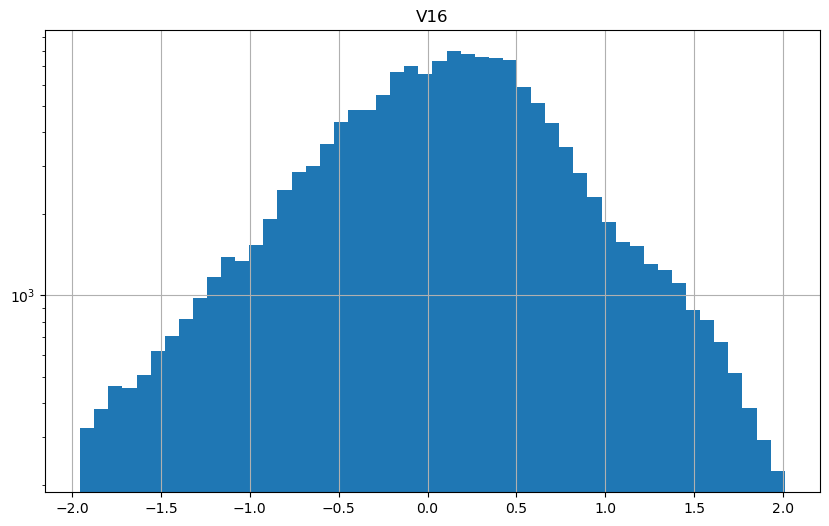

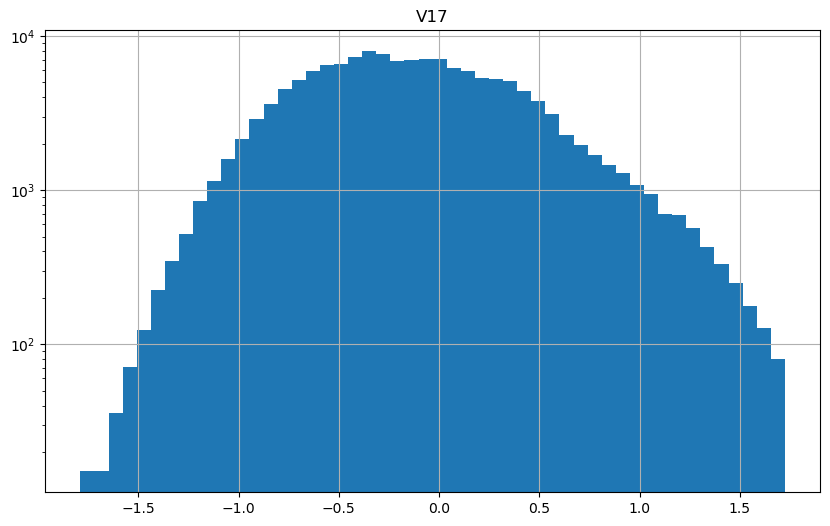

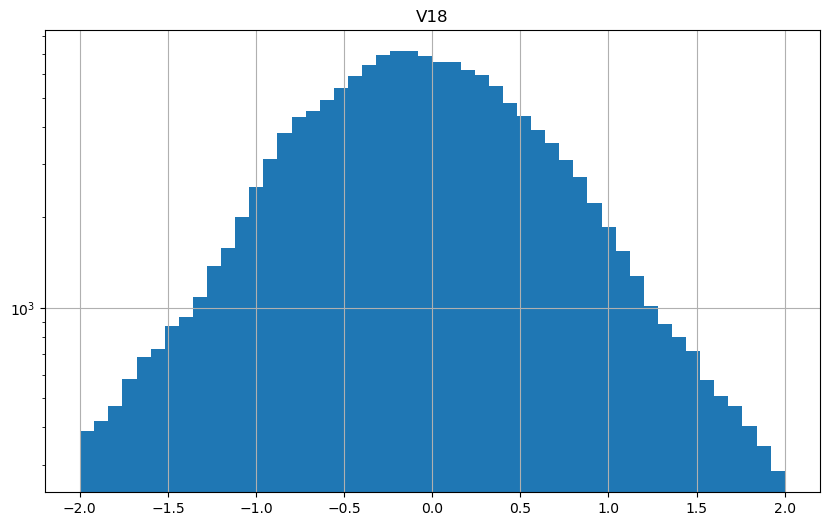

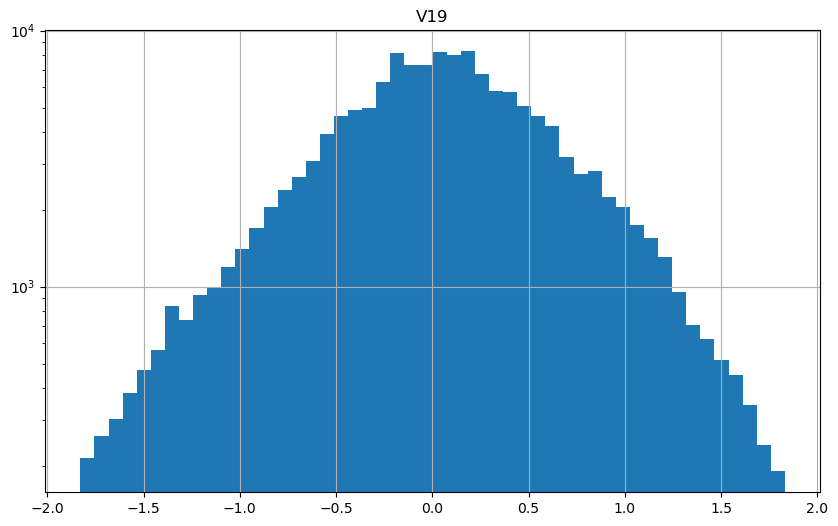

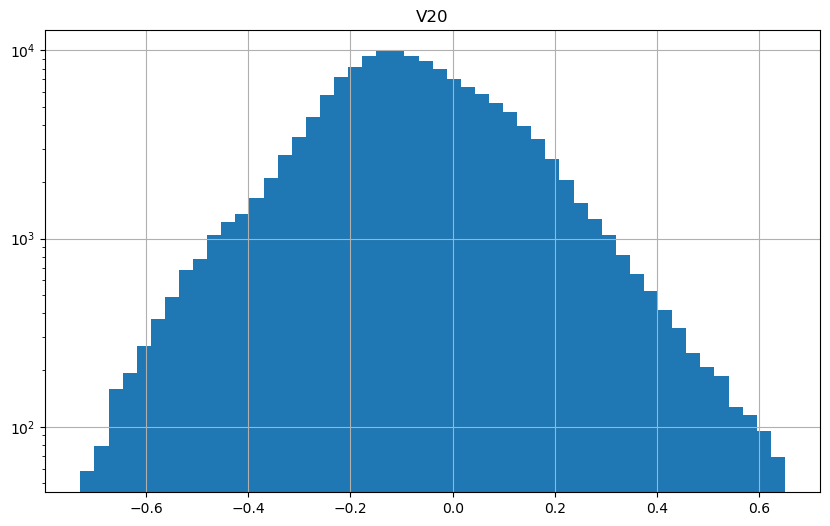

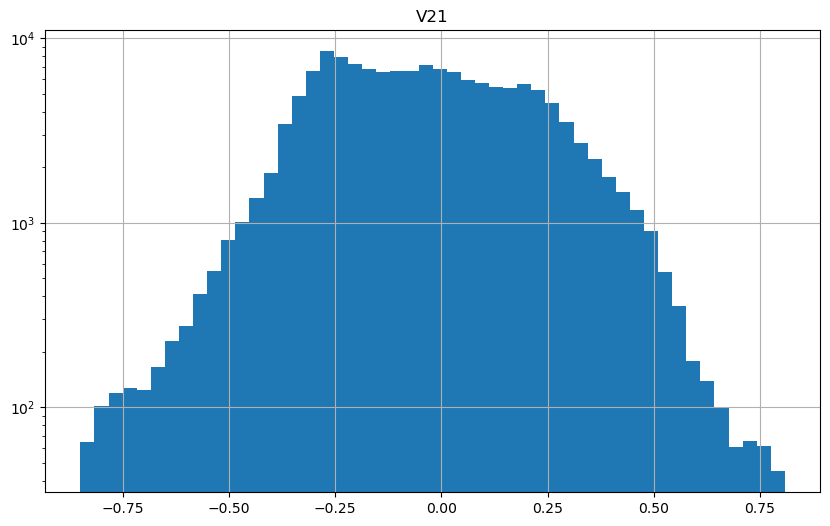

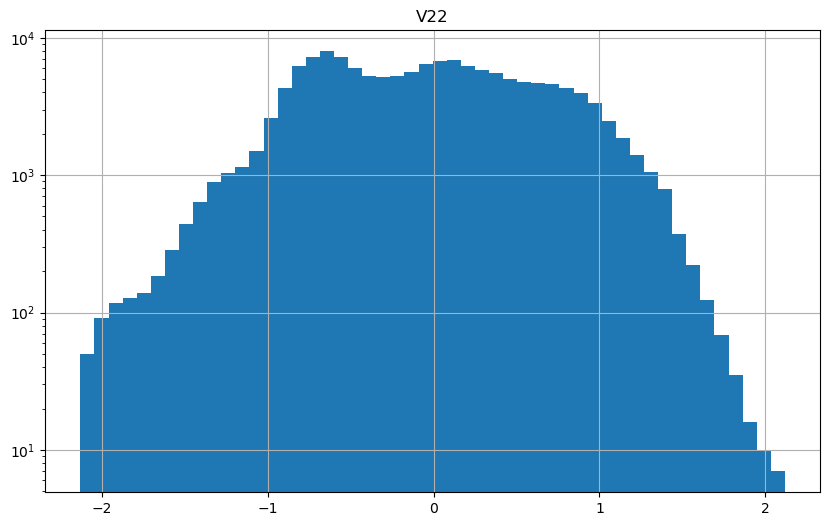

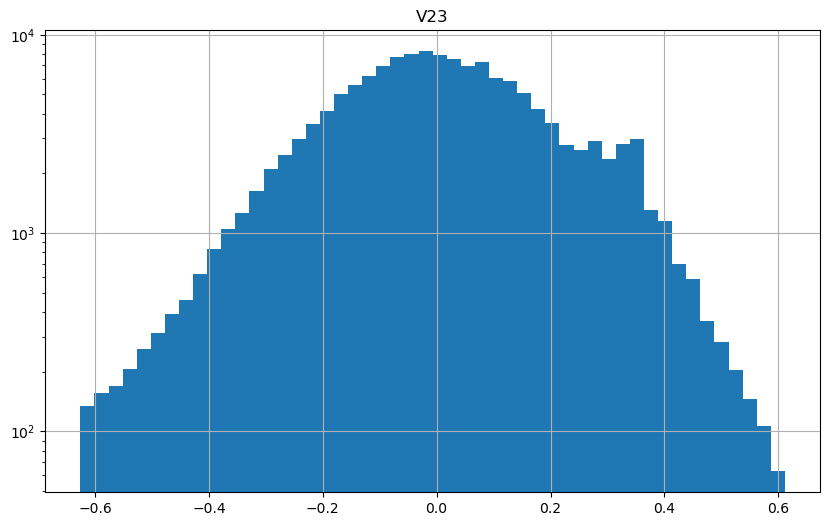

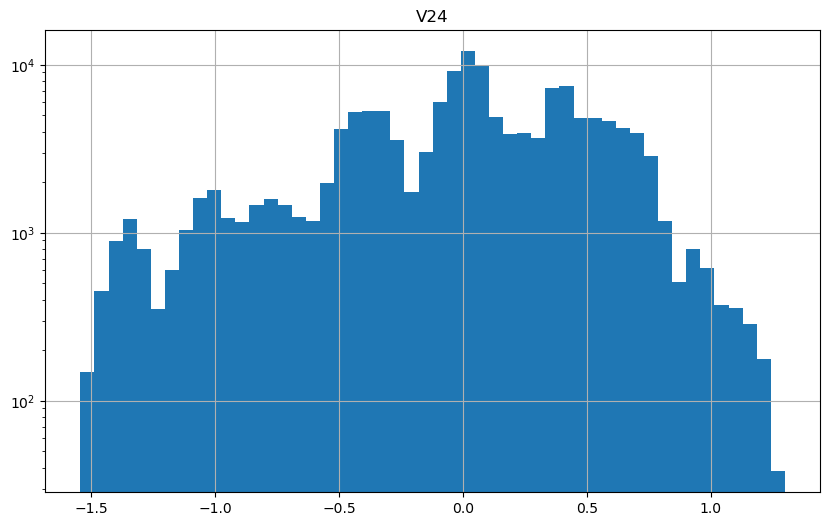

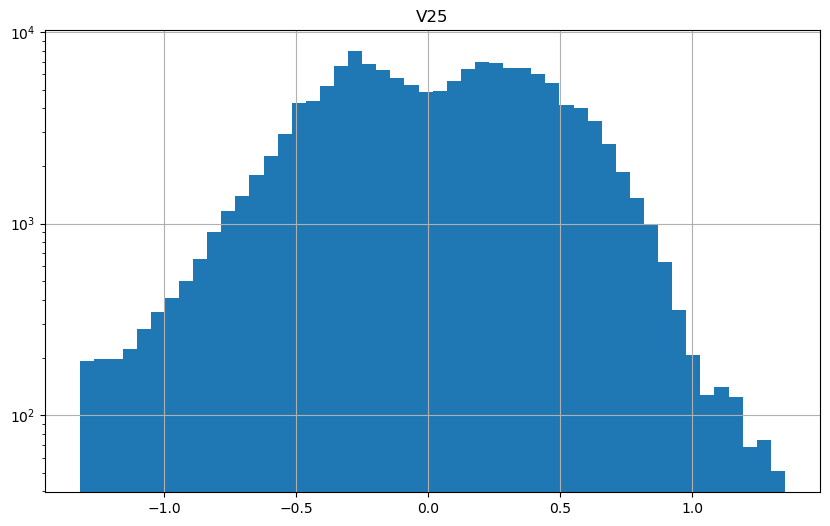

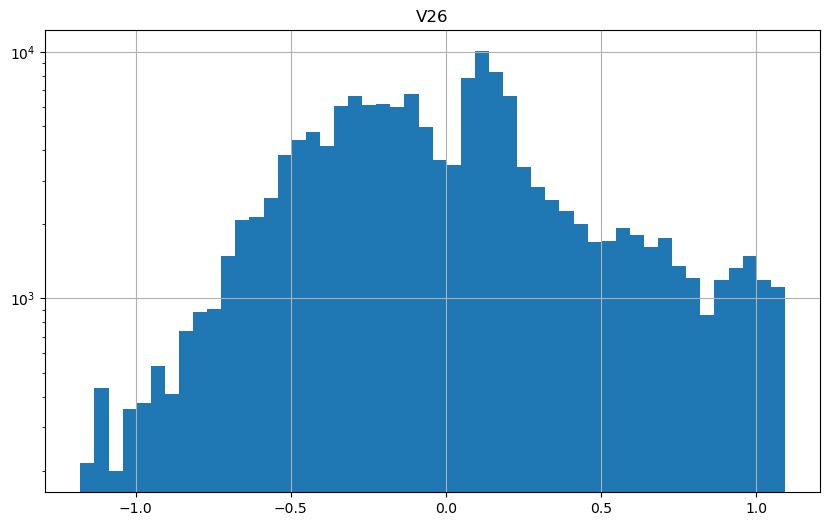

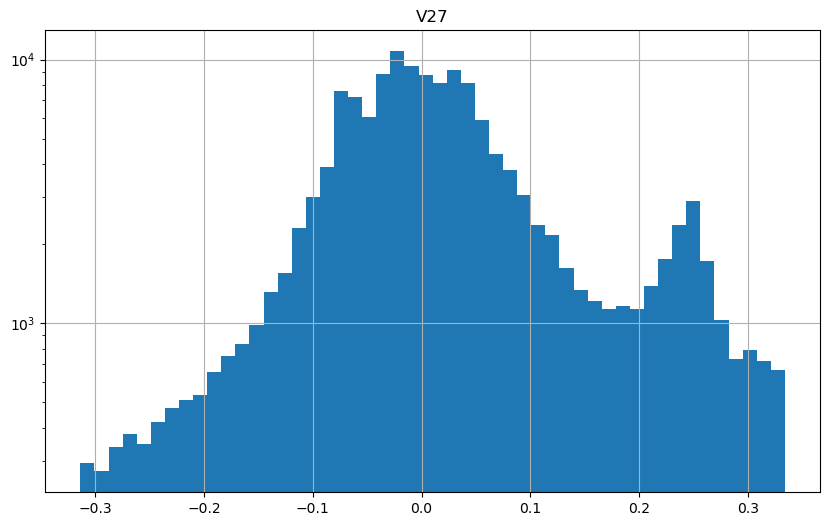

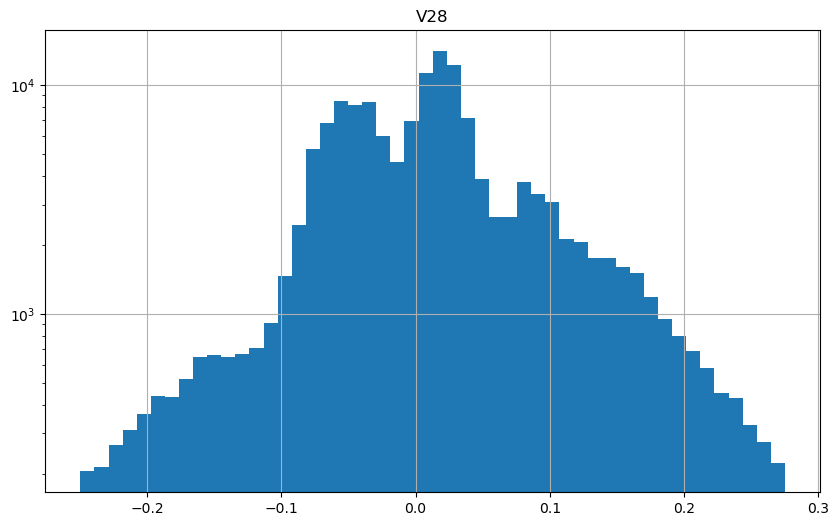

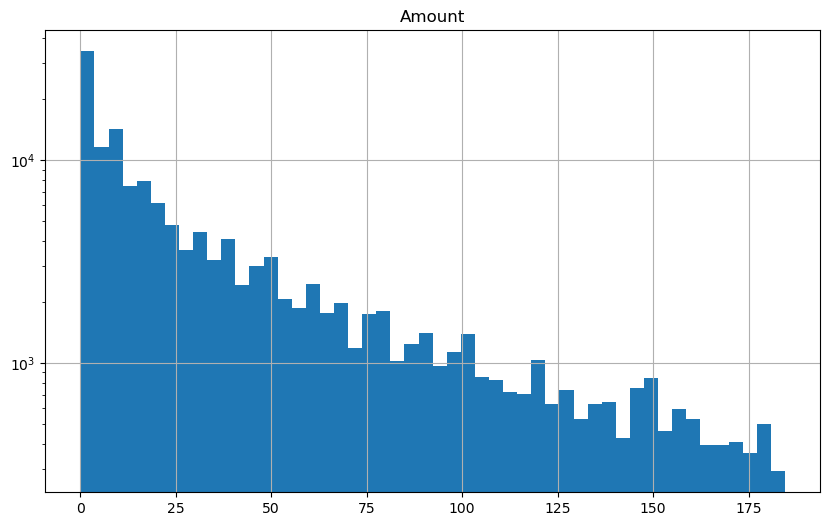

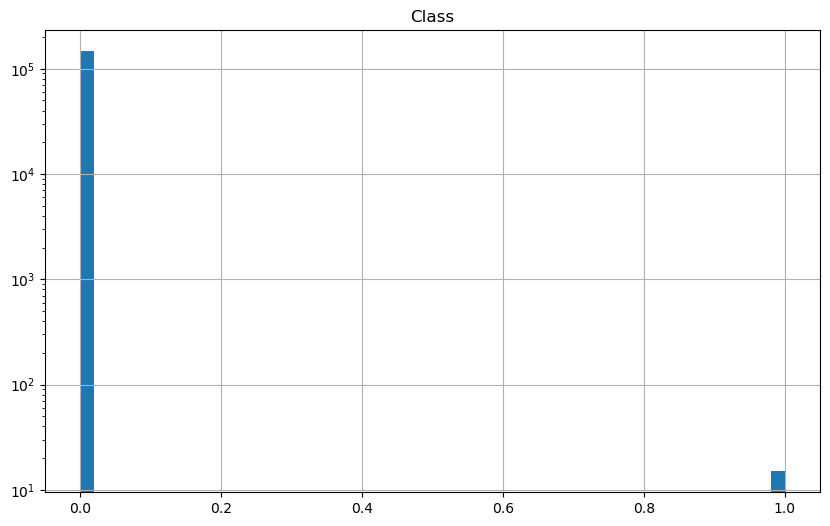

In [28]:
for i in lst[1:]: # iterating all the rows
    creditcard_data[i].hist(bins=50,figsize=(10,6))
    
    # Width of each bin is = (max value of data – min value of data) / total number of bins 
    # hist means histogram, here we using with the help of matplotlib , it gives some bins to understand bars
    
    plt.yscale('log') 
    #the type of conversion of the scale, to convert y-axes to logarithmic scale we pass the “log” keyword or the matplotlib. scale
    #LogScale class to the yscale method
    plt.title(i)
    
    plt.show()
    # Show the image

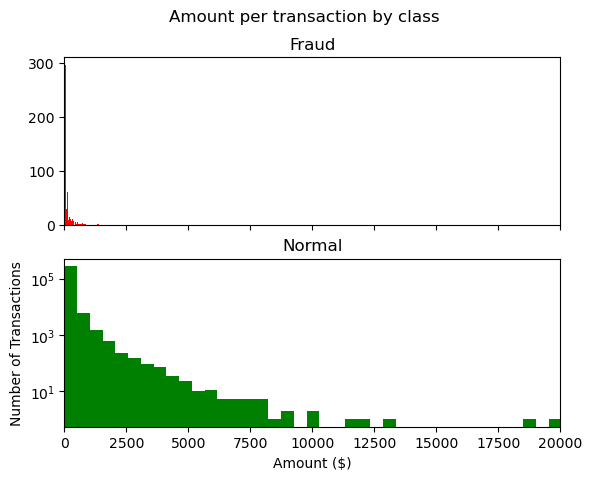

In [29]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins, color='Red')
ax1.set_title('Fraud')
ax2.hist(Valid.Amount, bins = bins, color='green')
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

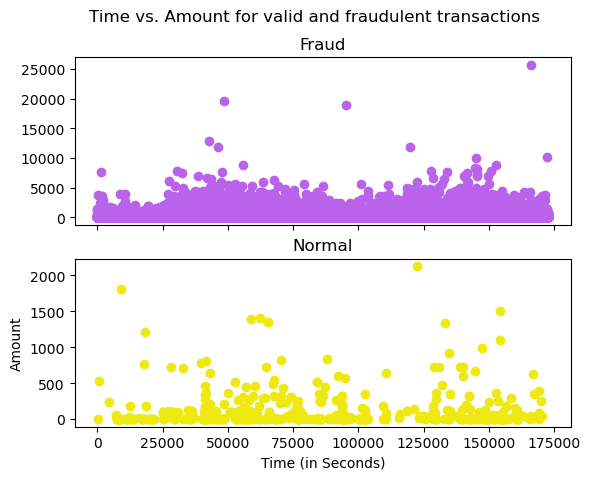

In [30]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time vs. Amount for valid and fraudulent transactions')
ax1.scatter(Valid.Time, Valid.Amount, color='#B963EB')
ax1.set_title('Fraud')
ax2.scatter(Fraud.Time, Fraud.Amount, color='#EDE911')
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [31]:
valid_sample = Valid.sample(n=492)

Concatenating two DataFrames

In [32]:
new_dataset = pd.concat([valid_sample, Fraud], axis=0)

In [33]:
new_dataset.shape

(984, 31)

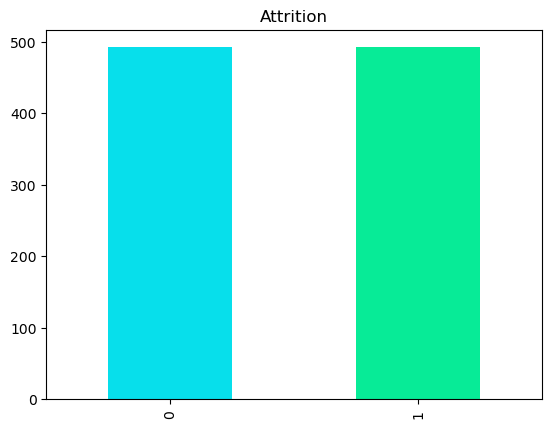

In [34]:
colors = ['#07DFEB', '#07EB97']  # set colors for the bars

new_dataset['Class'].value_counts().plot(kind='bar', color=colors).set_title('Attrition')
plt.show()

In [35]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
197123,131858.0,1.670073,-0.323731,-1.742125,2.996477,2.401412,4.748279,-0.687418,1.108143,-0.408466,...,0.145390,0.347368,0.025978,0.713075,0.100474,0.144174,-0.004016,-0.035101,107.92,0
186836,127274.0,-0.945945,0.611657,-0.424741,-0.387763,0.332512,-1.274762,0.587451,0.349806,0.253456,...,-0.147654,-0.559185,0.023698,-0.157000,0.274314,-0.063780,0.093176,-0.064382,74.44,0
267857,162958.0,-0.249563,0.006434,0.924614,-0.409474,0.059281,-0.394732,-0.079546,-0.055023,-2.053975,...,0.496679,1.297836,-0.543505,-0.263707,0.626669,0.645181,0.048950,0.052375,15.00,0
147226,88261.0,-0.589710,0.553972,0.019133,-0.748068,0.936624,-0.339825,0.995021,-0.396527,0.409067,...,-0.190447,-0.344674,0.297400,0.651942,-0.391736,-0.779950,-0.726315,-0.255636,9.99,0
47694,43313.0,-1.799176,-0.095127,1.320995,1.644155,0.395866,-0.577063,0.299467,0.089911,0.384181,...,-0.254784,0.317671,0.796588,0.349820,-0.010178,-0.259233,-0.024921,-0.490961,5.49,0


In [36]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [37]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [38]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95718.223577,0.082189,0.137850,0.000091,-0.014851,0.126011,0.012804,0.024399,-0.029597,0.036990,...,0.007334,-0.018745,0.019776,0.002779,-0.03871,-0.002840,0.009773,0.031807,-0.012071,67.051870
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [39]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

Split the data into Training data & Testing Data

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Apply LogisticRegression using Sklearn library

In [41]:
# Scale the data using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(787, 30) (197, 30) (787,) (197,)


In [43]:
model = LogisticRegression(max_iter=1000)

In [44]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [45]:
# Apply 10-fold cross-validation
cv_scores = cross_val_score(model, X, Y, cv=5)

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print("CV accuracy std:", cv_scores.std())

Cross-validation scores: [0.96954315 0.92893401 0.9035533  0.92893401 0.91326531]
Mean CV accuracy: 0.9288459546255051
CV accuracy std: 0.02253331756806742


In [46]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [47]:
print('Accuracy on Training data : ', training_data_accuracy)
print("Precision scores  on Training Data :",precision_score(Y_train, X_train_prediction))
print("Recall scores  on Training Data:",recall_score(Y_train, X_train_prediction))
print("F1 scores on Training Data:",f1_score(Y_train, X_train_prediction))
print('Training classification report : \n',classification_report(Y_train, X_train_prediction))
print('Training confusion matrix : \n',confusion_matrix(Y_train, X_train_prediction))
print('Log loss on Training Data :', log_loss(Y_train, X_train_prediction))
print("\n")
print('Accuracy score on Test Data : ', test_data_accuracy)
print("Precision scores  on Test Data :",precision_score(Y_test, X_test_prediction))
print("Recall scores  on Test Data:",recall_score(Y_test, X_test_prediction))
print("F1 scores on Test Data:",f1_score(Y_test, X_test_prediction))
print('Classification report on Test Data : \n',classification_report(Y_test, X_test_prediction))
print('Confusion matrix score on Test Data : \n',confusion_matrix(Y_test, X_test_prediction))
print('Log loss on Test Data:', log_loss(Y_test, X_test_prediction))

Accuracy on Training data :  0.9542566709021602
Precision scores  on Training Data : 0.9811827956989247
Recall scores  on Training Data: 0.9263959390862944
F1 scores on Training Data: 0.9530026109660574
Training classification report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       393
           1       0.98      0.93      0.95       394

    accuracy                           0.95       787
   macro avg       0.96      0.95      0.95       787
weighted avg       0.96      0.95      0.95       787

Training confusion matrix : 
 [[386   7]
 [ 29 365]]
Log loss on Training Data : 1.5799257273174034


Accuracy score on Test Data :  0.9187817258883249
Precision scores  on Test Data : 0.9555555555555556
Recall scores  on Test Data: 0.8775510204081632
F1 scores on Test Data: 0.9148936170212767
Classification report on Test Data : 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92   

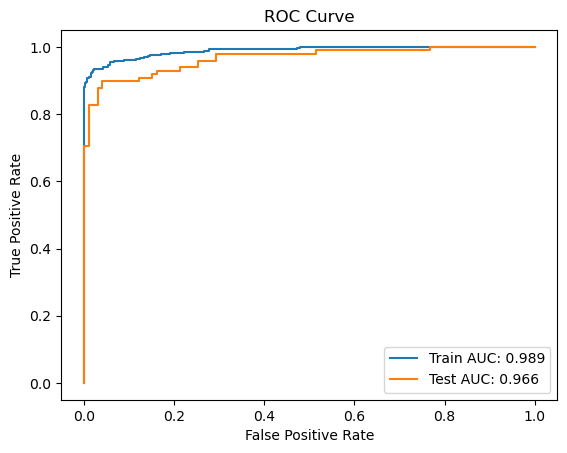

AUC for training dataset: 0.989
AUC for testing dataset: 0.966


In [48]:
# obtain predicted probabilities of positive class
train_probs = model.predict_proba(X_train)[:,1]
test_probs = model.predict_proba(X_test)[:,1]

# calculate false positive rate, true positive rate, and thresholds for train set
train_fpr_lr1, train_tpr_lr1, train_thresholds = roc_curve(Y_train, train_probs)

# calculate false positive rate, true positive rate, and thresholds for test set
test_fpr_lr1, test_tpr_lr1, test_thresholds = roc_curve(Y_test, test_probs)

train_lr1 = roc_auc_score(Y_train, train_probs)
test_lr1 = roc_auc_score(Y_test, test_probs)
# plot ROC curves and AUC for train and test sets
plt.plot(train_fpr_lr1, train_tpr_lr1, label='Train AUC: %.3f' % train_lr1)
plt.plot(test_fpr_lr1, test_tpr_lr1, label='Test AUC: %.3f' % test_lr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print('AUC for training dataset: %.3f' % train_lr1)
print('AUC for testing dataset: %.3f' % test_lr1)

# Using statsmodels:

In [49]:
# fit the logistic regression model on train dataset using statsmodels
logit_model = sm.Logit(Y_train, X_train)
result = logit_model.fit(maxiter=1000)

# predict target variable for both train and test datasets
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)

# convert probabilities to binary predictions
y_train_pred[y_train_pred > 0.5] = 1
y_train_pred[y_train_pred <= 0.5] = 0
y_test_pred[y_test_pred > 0.5] = 1
y_test_pred[y_test_pred <= 0.5] = 0

# calculate accuracy for train and test datasets
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

Optimization terminated successfully.
         Current function value: 0.178718
         Iterations 9


In [50]:
print("Train Accuracy:", train_accuracy)
print("Precision scores  on Training Data :",precision_score(Y_train, y_train_pred))
print("Recall scores  on Training Data:",recall_score(Y_train, y_train_pred))
print("F1 scores on Training Data:",f1_score(Y_train, y_train_pred))
print("Training Classification Report:\n", classification_report(Y_train, y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(Y_train, y_train_pred))
print('Log loss on Training Data :', log_loss(Y_train, y_train_pred))

print("\n")
print("Test Accuracy:", test_accuracy)
print("Precision scores  on Test Data :",precision_score(Y_test, y_test_pred))
print("Recall scores  on Test Data:",recall_score(Y_test, y_test_pred))
print("F1 scores on Test Data:",f1_score(Y_test, y_test_pred))
print("Testing Classification Report:\n", classification_report(Y_test, y_test_pred))
print("Testing Confusion Matrix:\n", confusion_matrix(Y_test, y_test_pred))
print('Log loss on Test Data:', log_loss(Y_test, y_test_pred))

Train Accuracy: 0.9364675984752223
Precision scores  on Training Data : 0.9858757062146892
Recall scores  on Training Data: 0.8857868020304569
F1 scores on Training Data: 0.9331550802139037
Training Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       393
           1       0.99      0.89      0.93       394

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787

Training Confusion Matrix:
 [[388   5]
 [ 45 349]]
Log loss on Training Data : 2.1943364901304774


Test Accuracy: 0.8934010152284264
Precision scores  on Test Data : 0.963855421686747
Recall scores  on Test Data: 0.8163265306122449
F1 scores on Test Data: 0.8839779005524863
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        99
           1       0.96      0.82

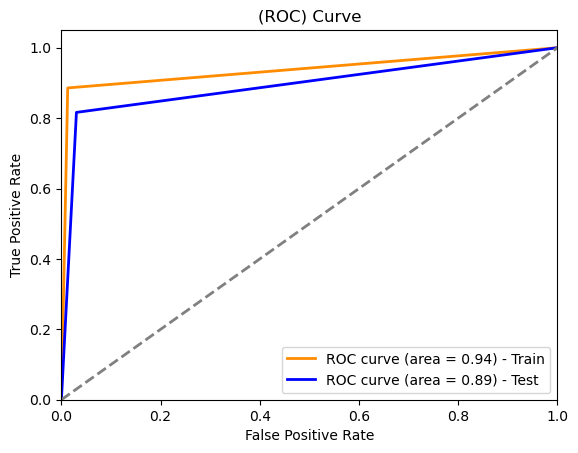

AUC for training dataset: 0.94
AUC for testing dataset: 0.89


In [51]:
# compute ROC curve and AUC for training dataset
fpr_train_lr2, tpr_train_lr2, thresholds_train_lr2 = roc_curve(Y_train, y_train_pred)
roc_auc_train_lr2 = auc(fpr_train_lr2, tpr_train_lr2)

# compute ROC curve and AUC for testing dataset
fpr_test_lr2, tpr_test_lr2, thresholds_test_lr2 = roc_curve(Y_test, y_test_pred)
roc_auc_test_lr2 = auc(fpr_test_lr2, tpr_test_lr2)

# plot ROC curves for training and testing datasets
plt.figure()
lw = 2
plt.plot(fpr_train_lr2, tpr_train_lr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f) - Train' % roc_auc_train_lr2)
plt.plot(fpr_test_lr2, tpr_test_lr2, color='blue',
         lw=lw, label='ROC curve (area = %0.2f) - Test' % roc_auc_test_lr2)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc="lower right")
plt.show()

auc_train = roc_auc_score(Y_train, y_train_pred)
print('AUC for training dataset: %.2f' % auc_train)
auc_test = roc_auc_score(Y_test, y_test_pred)
print('AUC for testing dataset: %.2f' % auc_test)

# DecisionTreeClassifier

# Apply DecisionTreeClassifier using sklearn

In [52]:
# Train the model
dtc = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

In [53]:
# Make predictions on the train and test sets
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

In [54]:
# Calculate accuracy scores
train_accuracy = accuracy_score(Y_train, y_train_pred)
print("Train Accuracy:",train_accuracy)
print("Train confusion matrice:\n",confusion_matrix(Y_train, y_train_pred))
print("Train precision scores:",precision_score(Y_train, y_train_pred))
print("Train recall scores:",recall_score(Y_train, y_train_pred))
print("Train F1 scores:",f1_score(Y_train, y_train_pred))
print("Training Classification Report:\n", classification_report(Y_train, y_train_pred))
print('Log loss on Training Data :', log_loss(Y_train, y_train_pred))
print('\n')
# Calculate accuracy scores
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("Test Accuracy:",test_accuracy)
print("Test confusion matrices:\n",confusion_matrix(Y_test, y_test_pred))
print("Test precision scores:",precision_score(Y_test, y_test_pred))
print("Test recall scores:",recall_score(Y_test, y_test_pred))
print("Test F1 scores:",f1_score(Y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(Y_test, y_test_pred))
print('Test Log loss on :', log_loss(Y_test, y_test_pred))

Train Accuracy: 0.9440914866581956
Train confusion matrice:
 [[373  20]
 [ 24 370]]
Train precision scores: 0.9487179487179487
Train recall scores: 0.9390862944162437
Train F1 scores: 0.9438775510204082
Training Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       393
           1       0.95      0.94      0.94       394

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787

Log loss on Training Data : 1.9310319610224582


Test Accuracy: 0.8883248730964467
Test confusion matrices:
 [[89 10]
 [12 86]]
Test precision scores: 0.8958333333333334
Test recall scores: 0.8775510204081632
Test F1 scores: 0.8865979381443299
Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        99
           1       0.90      0.88      0.89        98



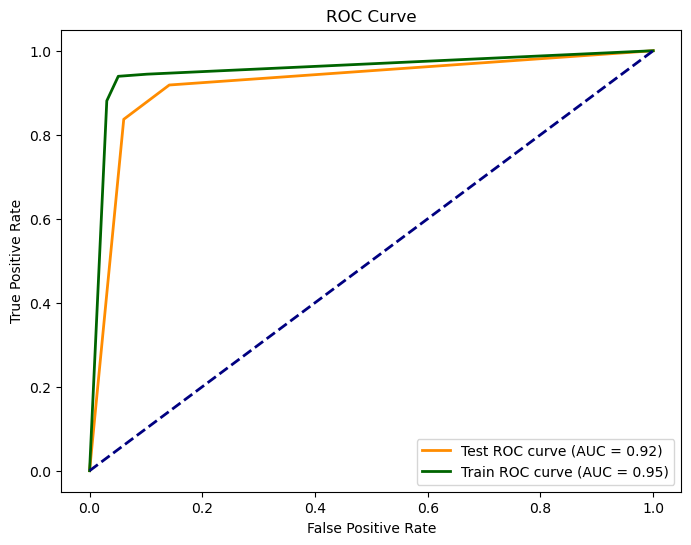

AUC score on testing data: 0.9198103483817769
AUC score on training data: 0.9530295397889461


In [55]:
# Predict the probabilities of attrition for the test data
y_prob_test = dtc.predict_proba(X_test)[:, 1]

# Predict the probabilities of attrition for the test data
y_prob_train = dtc.predict_proba(X_train)[:, 1]

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_test_dt1, tpr_test_dt1, thresholds_dt1 = roc_curve(Y_test, y_prob_test)
roc_auc_dt1 = auc(fpr_test_dt1, tpr_test_dt1)

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_train_dt1, tpr_train_dt1, thresholds_train_dt1 = roc_curve(Y_train, y_prob_train)
roc_auc_train_dt1 = auc(fpr_train_dt1, tpr_train_dt1)

# Plot the ROC curves for train and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_dt1, tpr_test_dt1, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_dt1:.2f})')
plt.plot(fpr_train_dt1, tpr_train_dt1, color='darkgreen', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train_dt1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print("AUC score on testing data:",roc_auc_dt1)
print("AUC score on training data:",roc_auc_train_dt1)

# Apply DecisionTreeClassifier using XGBoost

In [56]:
# Build the XGBoost Decision Tree model
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)
params = {'max_depth': 3, 'eta': 0.1, 'objective': 'binary:logistic'}
xgb_model = xgb.train(params, dtrain)

# Make predictions
y_pred = xgb_model.predict(dtest)
y_pred = [round(value) for value in y_pred]

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)

In [57]:
# Define the model with early stopping
model = xgb.XGBClassifier(n_estimators=10000, random_state=42, eval_metric='logloss', early_stopping_rounds=10)

# Train the model
model.fit(X_train, Y_train, eval_set=[(X_test, Y_test)], verbose=False)

# Make predictions on the train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(Y_train, y_train_pred)
print("Train accuracy score:",train_accuracy)
print("Train confusion matrice:\n",confusion_matrix(Y_train, y_train_pred))
print("Train precision scores:",precision_score(Y_train, y_train_pred))
print("Train recall scores:",recall_score(Y_train, y_train_pred))
print("Train F1 scores:",f1_score(Y_train, y_train_pred))
print("Training Classification Report:\n", classification_report(Y_train, y_train_pred))
print('Training Log loss :', log_loss(Y_train, y_train_pred))
print("\n")
# Calculate accuracy scores
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("Test accuracy scores:", test_accuracy)
print("Test confusion matrices:\n", confusion_matrix(Y_test, y_test_pred))
print("Test precision scores:", precision_score(Y_test, y_test_pred))
print("Test recall scores:",  recall_score(Y_test, y_test_pred))
print("Test F1 scores:", f1_score(Y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(Y_test, y_test_pred))
print('Training Log loss :', log_loss(Y_test, y_test_pred))

Train accuracy score: 0.9961880559085133
Train confusion matrice:
 [[393   0]
 [  3 391]]
Train precision scores: 1.0
Train recall scores: 0.9923857868020305
Train F1 scores: 0.9961783439490446
Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       393
           1       1.00      0.99      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787

Training Log loss : 0.13165988460575961


Test accuracy scores: 0.9187817258883249
Test confusion matrices:
 [[92  7]
 [ 9 89]]
Test precision scores: 0.9270833333333334
Test recall scores: 0.9081632653061225
Test F1 scores: 0.9175257731958762
Test Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        99
           1       0.93      0.91      0.92        98

    accur

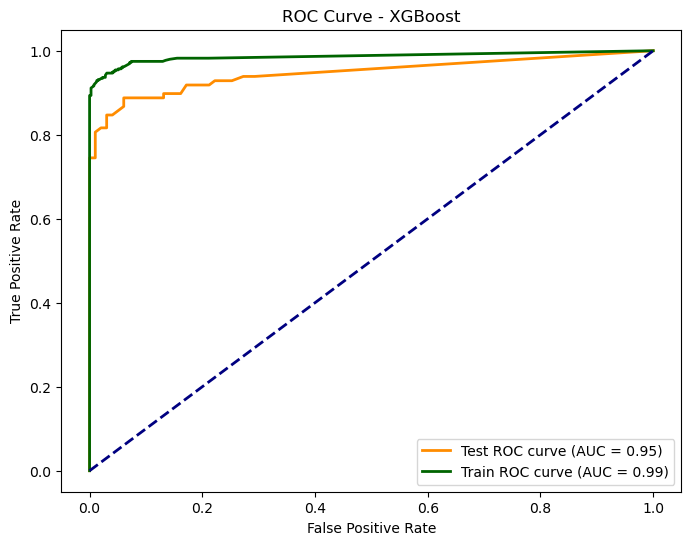

AUC score on testing data: 0.9859179034112192
AUC score on training data: 0.9468150896722326


In [58]:
# Predict the scores of attrition for the test data
y_score_test = xgb_model.predict(dtest, output_margin=True)

# Predict the scores of attrition for the train data
y_score_train = xgb_model.predict(dtrain, output_margin=True)

# Convert the scores to probabilities
y_prob_test = 1 / (1 + np.exp(-y_score_test))
y_prob_train = 1 / (1 + np.exp(-y_score_train))

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_test_dt2, tpr_test_dt2, thresholds_dt2 = roc_curve(Y_test, y_prob_test)
roc_auc_test_dt2 = auc(fpr_test_dt2, tpr_test_dt2)

fpr_train_dt2, tpr_train_dt2, thresholds_train_dt2 = roc_curve(Y_train, y_prob_train)
roc_auc_train_dt2 = auc(fpr_train_dt2, tpr_train_dt2)

# Plot the ROC curves for train and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_dt2, tpr_test_dt2, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test_dt2:.2f})')
plt.plot(fpr_train_dt2, tpr_train_dt2, color='darkgreen', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train_dt2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()
print("AUC score on testing data:",roc_auc_train_dt2)
print("AUC score on training data:",roc_auc_test_dt2)

# RandomForestClassifier

# Scikit-learn library implementation for RandomForestClassifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the random forest classifier
rfc = RandomForestClassifier(n_estimators=50, min_samples_split=10)

# Use RFE to select the best features
selector = RFECV(estimator=rfc, cv=5)
selector.fit(X_train, Y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train the model using only the selected features
rfc_model = rfc.fit(X_train_selected, Y_train)

# Predict the labels for train and test sets
y_train_pred = rfc_model.predict(X_train_selected)
y_test_pred = rfc_model.predict(X_test_selected)

# Predict the probabilities for the positive class for train and test sets
y_train_pred_proba = rfc_model.predict_proba(X_train_selected)
y_test_pred_proba = rfc_model.predict_proba(X_test_selected)

# Calculate the applicable accuracy measures for train set
train_accuracy = accuracy_score(Y_train, y_train_pred)
train_precision = precision_score(Y_train, y_train_pred)
train_recall = recall_score(Y_train, y_train_pred)
train_f1_score = f1_score(Y_train, y_train_pred)
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, y_train_pred_proba[:,1])
train_roc_auc = auc(train_fpr, train_tpr)
train_confusion_matrix = confusion_matrix(Y_train, y_train_pred)
train_classification_report = classification_report(Y_train, y_train_pred)

# Calculate the applicable accuracy measures for test set
test_accuracy = accuracy_score(Y_test, y_test_pred)
test_precision = precision_score(Y_test, y_test_pred)
test_recall = recall_score(Y_test, y_test_pred)
test_f1_score = f1_score(Y_test, y_test_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, y_test_pred_proba[:,1])
test_roc_auc = auc(test_fpr, test_tpr)
test_confusion_matrix = confusion_matrix(Y_test, y_test_pred)
test_classification_report = classification_report(Y_test, y_test_pred)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report

# Print the selected features
print("Selected Features:", selector.support_)
print("\n")

# Print the accuracy measures for train set
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1_score)
print("Train AUC Score:", train_roc_auc)
print("Train Confusion Matrix:\n", train_confusion_matrix)
print("Train Classification Report:\n", train_classification_report)
print('Training Log loss :', log_loss(Y_train, y_train_pred))
print("Training AUC score :",train_roc_auc)
print("\n")

# Print the accuracy measures for test set
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test AUC Score:", test_roc_auc)
print("Test Confusion Matrix:\n", test_confusion_matrix)
print("Test Classification Report:\n", test_classification_report)
print('Test Log loss :', log_loss(Y_test, y_test_pred))
print("Testing AUC score:",test_roc_auc)

Selected Features: [False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True]


Train Accuracy: 0.9822109275730623
Train Precision: 0.9973821989528796
Train Recall: 0.9670050761421319
Train F1 Score: 0.981958762886598
Train AUC Score: 0.9995479262732333
Train Confusion Matrix:
 [[392   1]
 [ 13 381]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       393
           1       1.00      0.97      0.98       394

    accuracy                           0.98       787
   macro avg       0.98      0.98      0.98       787
weighted avg       0.98      0.98      0.98       787

Training Log loss : 0.6144138108337744
Training AUC score : 0.9995479262732333


Test Accuracy: 0.9137055837563451
Test Precision: 0.9550561797752809
Test Recall: 0.8673469387755102
Test F1 Score: 0.9090909090909092


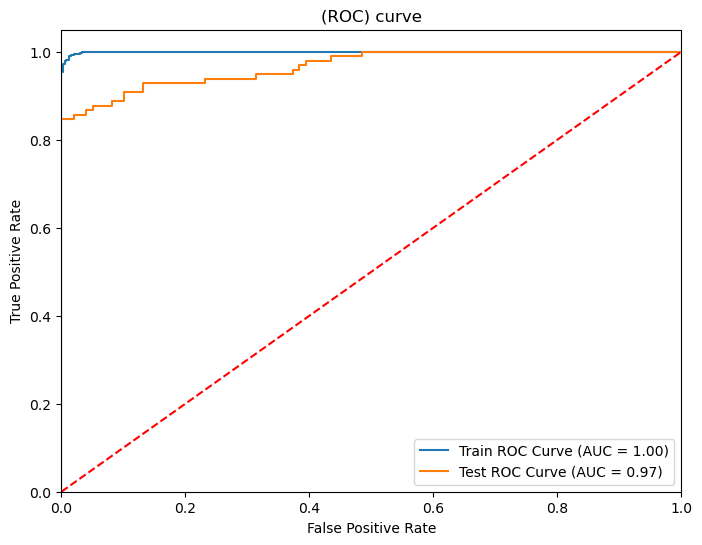

In [61]:
# Plot the ROC curve for test set
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Train ROC Curve (AUC = %0.2f)' % train_roc_auc)
plt.plot(test_fpr, test_tpr, label='Test ROC Curve (AUC = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) curve')
plt.legend(loc="lower right")
plt.show()

# XGBoost library implementation for RandomForestClassifier

In [62]:
# Instantiate the XGBoost classifier
xgb_clf = xgb.XGBRFClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training data
xgb_clf.fit(X_train, Y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=10, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', predictor=None, random_state=42,
                reg_alpha=None, ...)

In [63]:
# Predict the classes for the training and testing data
train_preds = xgb_clf.predict(X_train)
test_preds = xgb_clf.predict(X_test)

In [64]:
# Calculate the applicable accuracy measures for train set
train_accuracy = accuracy_score(Y_train, train_preds)
train_precision = precision_score(Y_train, train_preds)
train_recall = recall_score(Y_train, train_preds)
train_f1_score = f1_score(Y_train, train_preds)
train_confusion_matrix = confusion_matrix(Y_train, train_preds)
train_classification_report = classification_report(Y_train, train_preds)
# Calculate the applicable accuracy measures for train set
test_accuracy = accuracy_score(Y_test, test_preds)
test_precision = precision_score(Y_test, test_preds)
test_recall = recall_score(Y_test, test_preds)
test_f1_score = f1_score(Y_test, test_preds)
test_confusion_matrix = confusion_matrix(Y_test, test_preds)
test_classification_report = classification_report(Y_test, test_preds)

# Print the accuracy measures for train set
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1_score)
print("Train Confusion Matrix:\n", train_confusion_matrix)
print("Train Classification Report:\n", train_classification_report)
print('Train Log loss :', log_loss(Y_train, train_preds))
print("\n")
# Print the accuracy measures for train set
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)
print("Test Confusion Matrix:\n", test_confusion_matrix)
print("Train Classification Report:\n", test_classification_report)
print('Test Log loss :', log_loss(Y_test, test_preds))

Train Accuracy: 0.9834815756035579
Train Precision: 0.9948051948051948
Train Recall: 0.9720812182741116
Train F1 Score: 0.9833119383825416
Train Confusion Matrix:
 [[391   2]
 [ 11 383]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       393
           1       0.99      0.97      0.98       394

    accuracy                           0.98       787
   macro avg       0.98      0.98      0.98       787
weighted avg       0.98      0.98      0.98       787

Train Log loss : 0.5705281986387547


Test Accuracy: 0.8984771573604061
Test Precision: 0.8979591836734694
Test Recall: 0.8979591836734694
Test F1 Score: 0.8979591836734694
Test Confusion Matrix:
 [[89 10]
 [10 88]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        99
           1       0.90      0.90      0.90        98

    accuracy                           0.90   

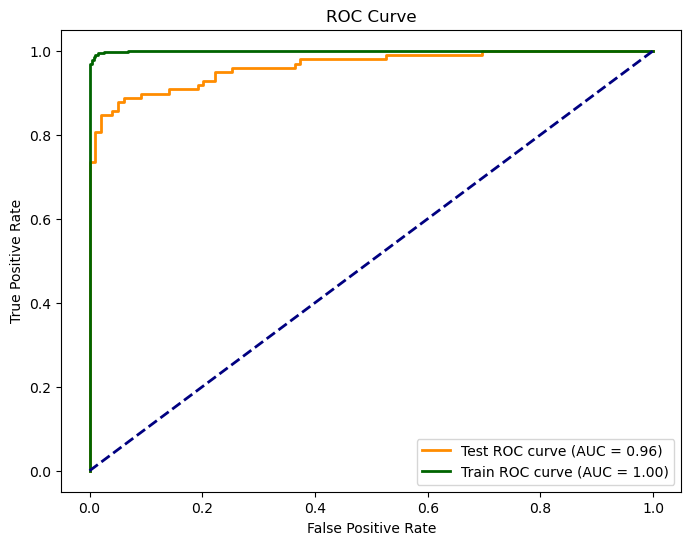

AUC score on testing data: 0.99953500988104
AUC score on training data: 0.9628942486085343


In [65]:
# Predict the probabilities of attrition for the test data
y_prob_test = xgb_clf.predict_proba(X_test)[:, 1]

# Predict the probabilities of attrition for the test data
y_prob_train = xgb_clf.predict_proba(X_train)[:, 1]

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_test_rf2, tpr_test_rf2, thresholds = roc_curve(Y_test, y_prob_test)
roc_auc_test_rf2 = auc(fpr_test_rf2, tpr_test_rf2)

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_train_rf2, tpr_train_rf2, thresholds_train_rf2 = roc_curve(Y_train, y_prob_train)
roc_auc_train_rf2 = auc(fpr_train_rf2, tpr_train_rf2)
# Plot the ROC curves for train and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_rf2, tpr_test_rf2, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test_rf2:.2f})')
plt.plot(fpr_train_rf2, tpr_train_rf2, color='darkgreen', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train_rf2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print("AUC score on testing data:",roc_auc_train_rf2)
print("AUC score on training data:",roc_auc_test_rf2)

# SVM

# SVM using Scikit-learn:

In [66]:
# Instantiate the oversampler
oversampler = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, Y_train_resampled = oversampler.fit_resample(X_train, Y_train)

# Train the SVM classifier on the resampled data
svm = SVC(probability=True)
svm.fit(X_train_resampled, Y_train_resampled)

# Make predictions on the resampled training data
y_train_pred = svm.predict(X_train_resampled)

# Calculate the evaluation metrics on the resampled training data
train_accuracy = accuracy_score(Y_train_resampled, y_train_pred)
train_precision = precision_score(Y_train_resampled, y_train_pred)
train_recall = recall_score(Y_train_resampled, y_train_pred)
train_f1 = f1_score(Y_train_resampled, y_train_pred)
train_cm = confusion_matrix(Y_train_resampled, y_train_pred)
train_classification_report = classification_report(Y_train_resampled, y_train_pred)

print("Training Accuracy: ", train_accuracy)
print("Training Precision: ", train_precision)
print("Training Recall: ", train_recall)
print("Training F1 Score: ", train_f1)
print("Training Confusion Matrix: ")
print(train_cm)
print("Training Classification Report: \n", train_classification_report)
print('Training Log loss :', log_loss(Y_train_resampled, y_train_pred))

# Make predictions on the test data
y_test_pred = svm.predict(X_test)

# Calculate the evaluation metrics on the test data
test_accuracy = accuracy_score(Y_test, y_test_pred)
test_precision = precision_score(Y_test, y_test_pred)
test_recall = recall_score(Y_test, y_test_pred)
test_f1 = f1_score(Y_test, y_test_pred)
test_cm = confusion_matrix(Y_test, y_test_pred)
test_classification_report = classification_report(Y_test, y_test_pred)

print("Test Accuracy: ", test_accuracy)
print("Test Precision: ", test_precision)
print("Test Recall: ", test_recall)
print("Test F1 Score: ", test_f1)
print("Test Confusion Matrix: ")
print(test_cm)
print("Test Classification Report: \n", test_classification_report)
print('Test Log loss :', log_loss(Y_test, y_test_pred))

Training Accuracy:  0.9543147208121827
Training Precision:  0.9837837837837838
Training Recall:  0.9238578680203046
Training F1 Score:  0.9528795811518325
Training Confusion Matrix: 
[[388   6]
 [ 30 364]]
Training Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       394
           1       0.98      0.92      0.95       394

    accuracy                           0.95       788
   macro avg       0.96      0.95      0.95       788
weighted avg       0.96      0.95      0.95       788

Training Log loss : 1.5779197307123938
Test Accuracy:  0.9137055837563451
Test Precision:  0.9550561797752809
Test Recall:  0.8673469387755102
Test F1 Score:  0.9090909090909092
Test Confusion Matrix: 
[[95  4]
 [13 85]]
Test Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        99
           1       0.96      0.87      0.91        98

    accuracy      

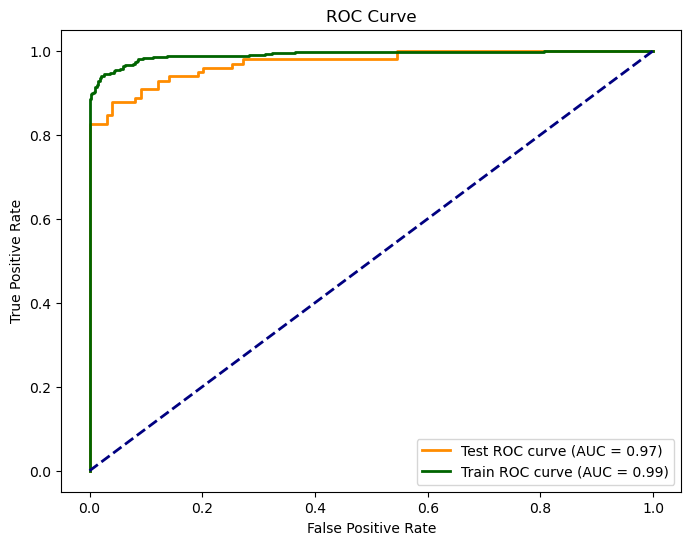

AUC score on testing data: 0.9908810271115073
AUC score on training data: 0.9710368996083282


In [67]:
# Predict the probabilities of attrition for the test data
y_prob_test = svm.predict_proba(X_test)[:, 1]

# Predict the probabilities of attrition for the test data
y_prob_train = svm.predict_proba(X_train)[:, 1]

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_test_svm1, tpr_test_svm1, thresholds_svm1 = roc_curve(Y_test, y_prob_test)
roc_auc_test_svm1 = auc(fpr_test_svm1, tpr_test_svm1)

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_train_svm1, tpr_train_svm1, thresholds_train_svm1 = roc_curve(Y_train, y_prob_train)
roc_auc_train_svm1 = auc(fpr_train_svm1, tpr_train_svm1)
# Plot the ROC curves for train and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_svm1, tpr_test_svm1, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test_svm1:.2f})')
plt.plot(fpr_train_svm1, tpr_train_svm1, color='darkgreen', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train_svm1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
print("AUC score on testing data:",roc_auc_train_svm1)
print("AUC score on training data:",roc_auc_test_svm1)

# SVM using XGBoost:

In [68]:
# Convert the data into a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Define the SVM parameters
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

# Train the SVM model
num_round = 10
bst = xgb.train(param, dtrain, num_round)

# Make predictions on the training and testing sets
y_train_pred = bst.predict(dtrain)
y_train_pred = [round(pred) for pred in y_train_pred]
y_test_pred = bst.predict(dtest)
y_test_pred = [round(pred) for pred in y_test_pred]

In [69]:
# Calculate accuracy, precision, recall and f1 score for train dataset
train_accuracy = accuracy_score(Y_train, y_train_pred)
train_precision = precision_score(Y_train, y_train_pred)
train_recall = recall_score(Y_train, y_train_pred)
train_f1_score = f1_score(Y_train, y_train_pred)
train_cm = confusion_matrix(Y_train, y_train_pred)
train_classification_report = classification_report(Y_train, y_train_pred)
# Calculate accuracy, precision, recall and f1 score for train dataset
test_accuracy = accuracy_score(Y_test, y_test_pred)
test_precision = precision_score(Y_test, y_test_pred)
test_recall = recall_score(Y_test, y_test_pred)
test_f1_score = f1_score(Y_test, y_test_pred)
test_cm = confusion_matrix(Y_test, y_test_pred)
test_classification_report = classification_report(Y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Train Precision:', train_precision)
print('Train Recall:', train_recall)
print('Train F1 Score:', train_f1_score)
print("Training Confusion Matrix: ")
print(train_cm)
print('Train Classification Report:\n', train_classification_report)
print('Test Log loss :', log_loss(Y_train, y_train_pred))
print("\n")
print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)
print('Test F1 Score:', test_f1_score)
print("Test Confusion Matrix: ")
print(test_cm)
print('Test Classification Report:\n', test_classification_report)
print('Test Log loss :', log_loss(Y_test, y_test_pred))

Train Accuracy: 0.9834815756035579
Train Precision: 0.9922480620155039
Train Recall: 0.9746192893401016
Train F1 Score: 0.9833546734955186
Training Confusion Matrix: 
[[390   3]
 [ 10 384]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       393
           1       0.99      0.97      0.98       394

    accuracy                           0.98       787
   macro avg       0.98      0.98      0.98       787
weighted avg       0.98      0.98      0.98       787

Test Log loss : 0.5705292146456548


Test Accuracy: 0.9086294416243654
Test Precision: 0.925531914893617
Test Recall: 0.8877551020408163
Test F1 Score: 0.90625
Test Confusion Matrix: 
[[92  7]
 [11 87]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        99
           1       0.93      0.89      0.91        98

    accuracy                           0.91       197
   

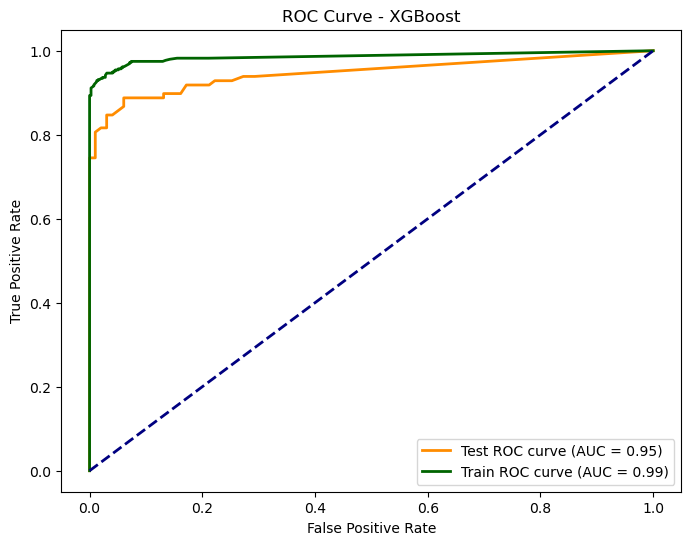

AUC score on testing data: 0.9859179034112192
AUC score on training data: 0.9468150896722326


In [70]:
# Predict the scores of attrition for the test data
y_score_test = xgb_model.predict(dtest, output_margin=True)

# Predict the scores of attrition for the train data
y_score_train = xgb_model.predict(dtrain, output_margin=True)

# Convert the scores to probabilities
y_prob_test = 1 / (1 + np.exp(-y_score_test))
y_prob_train = 1 / (1 + np.exp(-y_score_train))

# Calculate the false positive rate, true positive rate, and AUC of the ROC curve
fpr_test_svm2, tpr_test_svm2, thresholds_svm2 = roc_curve(Y_test, y_prob_test)
roc_auc_test_svm2 = auc(fpr_test_svm2, tpr_test_svm2)

fpr_train_svm2, tpr_train_svm2, thresholds_train_svm2 = roc_curve(Y_train, y_prob_train)
roc_auc_train_svm2= auc(fpr_train_svm2, tpr_train_svm2)

# Plot the ROC curves for train and test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_svm2, tpr_test_svm2, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test_svm2:.2f})')
plt.plot(fpr_train_svm2, tpr_train_svm2, color='darkgreen', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train_svm2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()
print("AUC score on testing data:",roc_auc_train_svm2)
print("AUC score on training data:",roc_auc_test_svm2)

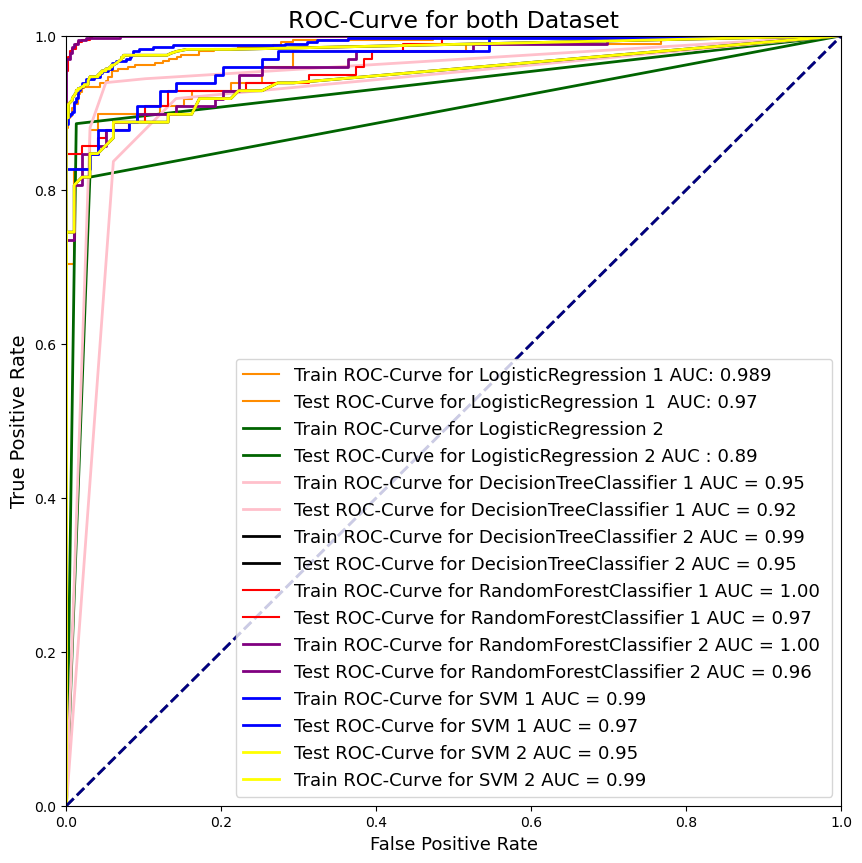

In [76]:
# plot the ROC curves
plt.figure(figsize=(10,10))

# plot ROC curves and AUC for train and test sets
plt.plot(train_fpr_lr1, train_tpr_lr1,color='darkorange', label='Train ROC-Curve for LogisticRegression 1 AUC: %.3f' % train_lr1)
plt.plot(test_fpr_lr1, test_tpr_lr1, color='darkorange',label='Test ROC-Curve for LogisticRegression 1  AUC: %.2f' % test_lr1)

plt.plot(fpr_train_lr2, tpr_train_lr2, color='darkgreen',lw=lw, label='Train ROC-Curve for LogisticRegression 2' % roc_auc_train_lr2)
plt.plot(fpr_test_lr2, tpr_test_lr2, color='darkgreen',lw=lw, label='Test ROC-Curve for LogisticRegression 2 AUC : %0.2f' % roc_auc_test_lr2)

plt.plot(fpr_train_dt1, tpr_train_dt1, color='pink', lw=2, label=f'Train ROC-Curve for DecisionTreeClassifier 1 AUC = {roc_auc_train_dt1:.2f}')
plt.plot(fpr_test_dt1, tpr_test_dt1, color='pink', lw=2, label=f'Test ROC-Curve for DecisionTreeClassifier 1 AUC = {roc_auc_dt1:.2f}')

plt.plot(fpr_train_dt2, tpr_train_dt2, color='black', lw=2, label=f'Train ROC-Curve for DecisionTreeClassifier 2 AUC = {roc_auc_train_dt2:.2f}')
plt.plot(fpr_test_dt2, tpr_test_dt2, color='black', lw=2, label=f'Test ROC-Curve for DecisionTreeClassifier 2 AUC = {roc_auc_test_dt2:.2f}')

plt.plot(train_fpr, train_tpr, color='red',label='Train ROC-Curve for RandomForestClassifier 1 AUC = %0.2f ' % train_roc_auc)
plt.plot(test_fpr, test_tpr,color='red',label='Test ROC-Curve for RandomForestClassifier 1 AUC = %0.2f' % test_roc_auc)

plt.plot(fpr_train_rf2, tpr_train_rf2, color='purple', lw=2, label=f'Train ROC-Curve for RandomForestClassifier 2 AUC = {roc_auc_train_rf2:.2f}')
plt.plot(fpr_test_rf2, tpr_test_rf2, color='purple', lw=2, label=f'Test ROC-Curve for RandomForestClassifier 2 AUC = {roc_auc_test_rf2:.2f}')

plt.plot(fpr_train_svm1, tpr_train_svm1, color='blue', lw=2, label=f'Train ROC-Curve for SVM 1 AUC = {roc_auc_train_svm1:.2f}')
plt.plot(fpr_test_svm1, tpr_test_svm1, color='blue', lw=2, label=f'Test ROC-Curve for SVM 1 AUC = {roc_auc_test_svm1:.2f}')

plt.plot(fpr_test_svm2, tpr_test_svm2, color='yellow', lw=2, label=f'Test ROC-Curve for SVM 2 AUC = {roc_auc_test_svm2:.2f}')
plt.plot(fpr_train_svm2, tpr_train_svm2, color='yellow', lw=2, label=f'Train ROC-Curve for SVM 2 AUC = {roc_auc_train_svm2:.2f}')



plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC-Curve for both Dataset', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

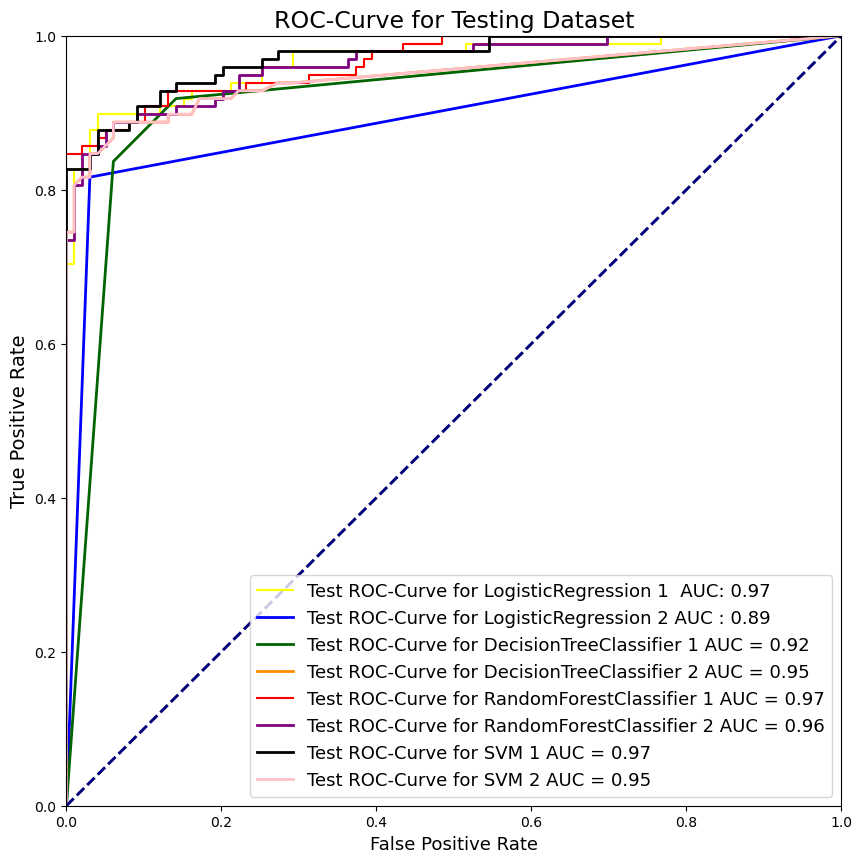

In [72]:
# plot the ROC curves
plt.figure(figsize=(10,10))

# plot ROC curves and AUC for train and test sets
plt.plot(test_fpr_lr1, test_tpr_lr1, color='yellow',label='Test ROC-Curve for LogisticRegression 1  AUC: %.2f' % test_lr1)
plt.plot(fpr_test_lr2, tpr_test_lr2, color='blue',lw=lw, label='Test ROC-Curve for LogisticRegression 2 AUC : %0.2f' % roc_auc_test_lr2)
plt.plot(fpr_test_dt1, tpr_test_dt1, color='darkgreen', lw=2, label=f'Test ROC-Curve for DecisionTreeClassifier 1 AUC = {roc_auc_dt1:.2f}')
plt.plot(fpr_test_dt2, tpr_test_dt2, color='darkorange', lw=2, label=f'Test ROC-Curve for DecisionTreeClassifier 2 AUC = {roc_auc_test_dt2:.2f}')
plt.plot(test_fpr, test_tpr,color='red',label='Test ROC-Curve for RandomForestClassifier 1 AUC = %0.2f' % test_roc_auc)
plt.plot(fpr_test_rf2, tpr_test_rf2, color='purple', lw=2, label=f'Test ROC-Curve for RandomForestClassifier 2 AUC = {roc_auc_test_rf2:.2f}')
plt.plot(fpr_test_svm1, tpr_test_svm1, color='black', lw=2, label=f'Test ROC-Curve for SVM 1 AUC = {roc_auc_test_svm1:.2f}')
plt.plot(fpr_test_svm2, tpr_test_svm2, color='pink', lw=2, label=f'Test ROC-Curve for SVM 2 AUC = {roc_auc_test_svm2:.2f}')


plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC-Curve for Testing Dataset', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

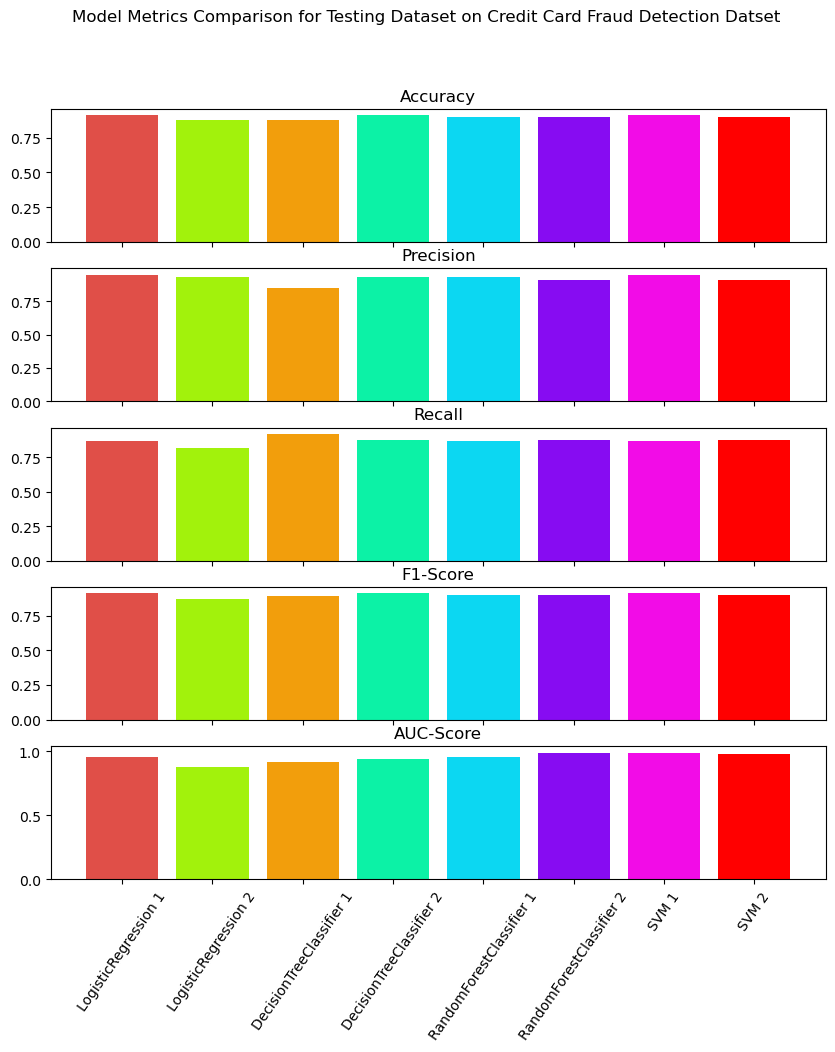

In [79]:
import matplotlib.pyplot as plt
import numpy as np

models = ['LogisticRegression 1', 'LogisticRegression 2', 'DecisionTreeClassifier 1', 'DecisionTreeClassifier 2', 'RandomForestClassifier 1', 'RandomForestClassifier 2'
          ,'SVM 1','SVM 2']
accuracy = np.array([0.91,0.88,0.88,0.91,0.90,0.90,0.91,0.90])
precision = np.array([0.95,0.93,0.85,0.93,0.93,0.91,0.95,0.91])
recall = np.array([0.87,0.82,0.92,0.88,0.87,0.88,0.87,0.88])
f1_score = np.array([0.91,0.87,0.89,0.91,0.90,0.90,0.91,0.90])
AUC = np.array([0.96,0.88,0.92,0.94,0.96,0.99,0.99,0.98])

fig, axs = plt.subplots(5, sharex=True, figsize=(10,10))
fig.suptitle('Model Metrics Comparison for Testing Dataset on Credit Card Fraud Detection Datset')

axs[0].bar(models, accuracy, color=['#e04f48', '#a2f20c', '#f29e0c', '#0cf2a6', '#0cd7f2', '#870cf2', '#f20ce7', 'red'])
axs[0].set_title('Accuracy')

axs[1].bar(models, precision, color=['#e04f48', '#a2f20c', '#f29e0c', '#0cf2a6', '#0cd7f2', '#870cf2', '#f20ce7', 'red'])
axs[1].set_title('Precision')

axs[2].bar(models, recall, color=['#e04f48', '#a2f20c', '#f29e0c', '#0cf2a6', '#0cd7f2', '#870cf2', '#f20ce7', 'red'])
axs[2].set_title('Recall')

axs[3].bar(models, f1_score, color=['#e04f48', '#a2f20c', '#f29e0c', '#0cf2a6', '#0cd7f2', '#870cf2', '#f20ce7', 'red'])
axs[3].set_title('F1-Score')

axs[4].bar(models, AUC, color=['#e04f48', '#a2f20c', '#f29e0c', '#0cf2a6', '#0cd7f2', '#870cf2', '#f20ce7', 'red'])
axs[4].set_title('AUC-Score')

plt.xticks(rotation=55)
plt.show()